# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:43:25.164113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:43:30.054539
2025-04-14 22:43:30.054539


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:43:21"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

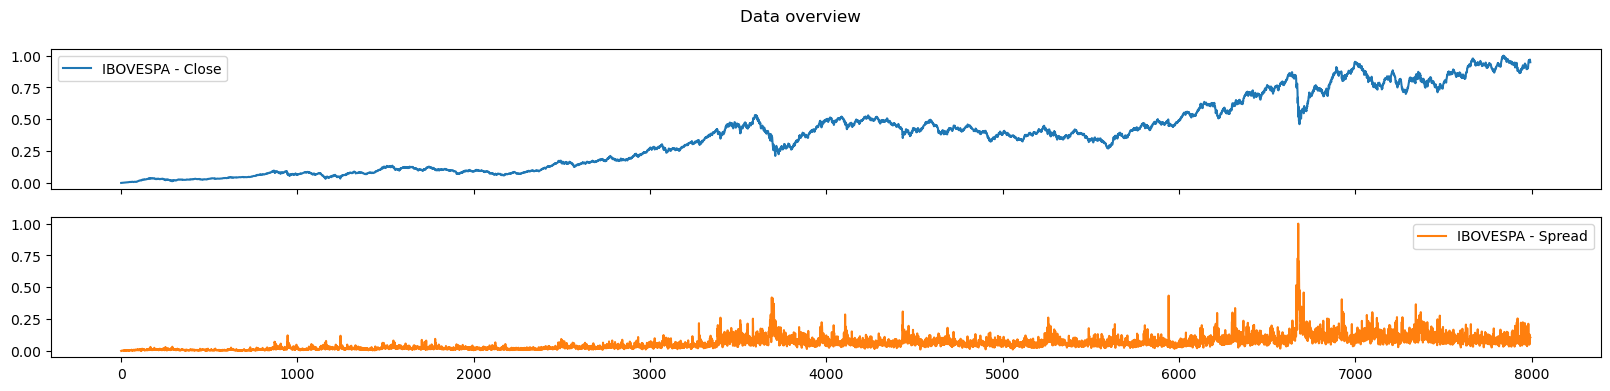

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

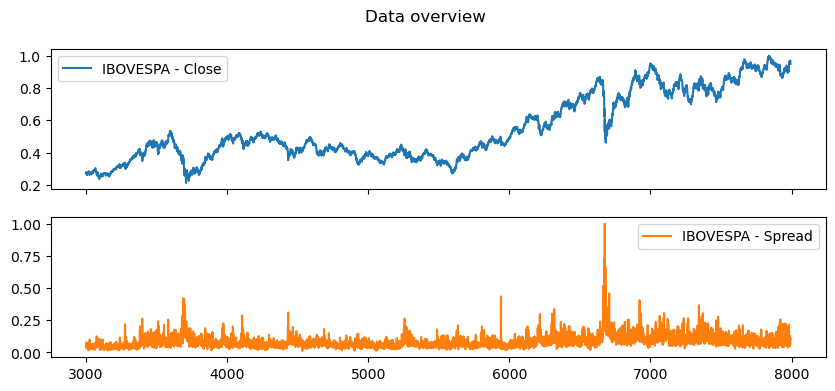

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

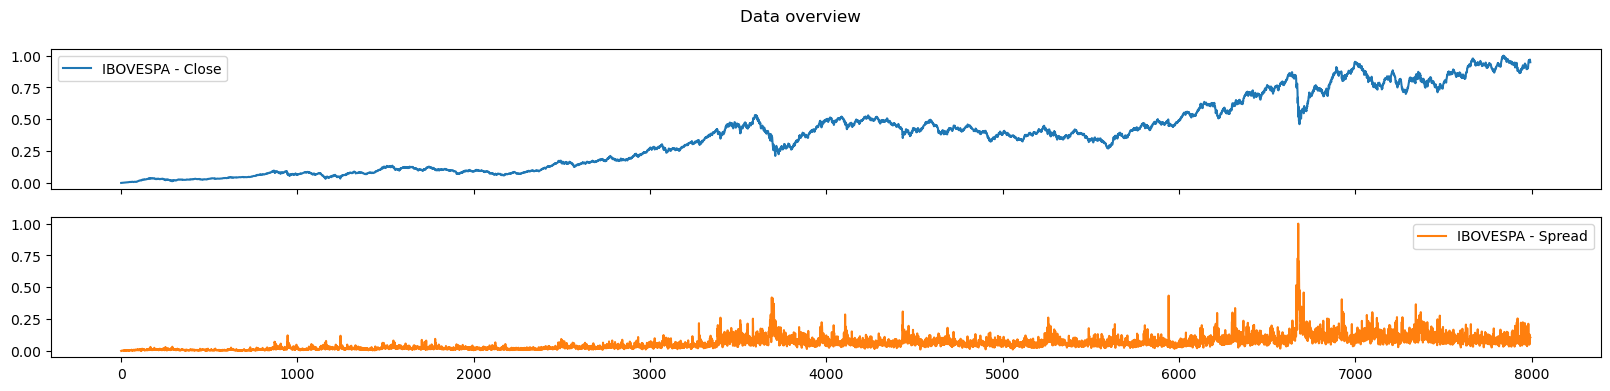

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

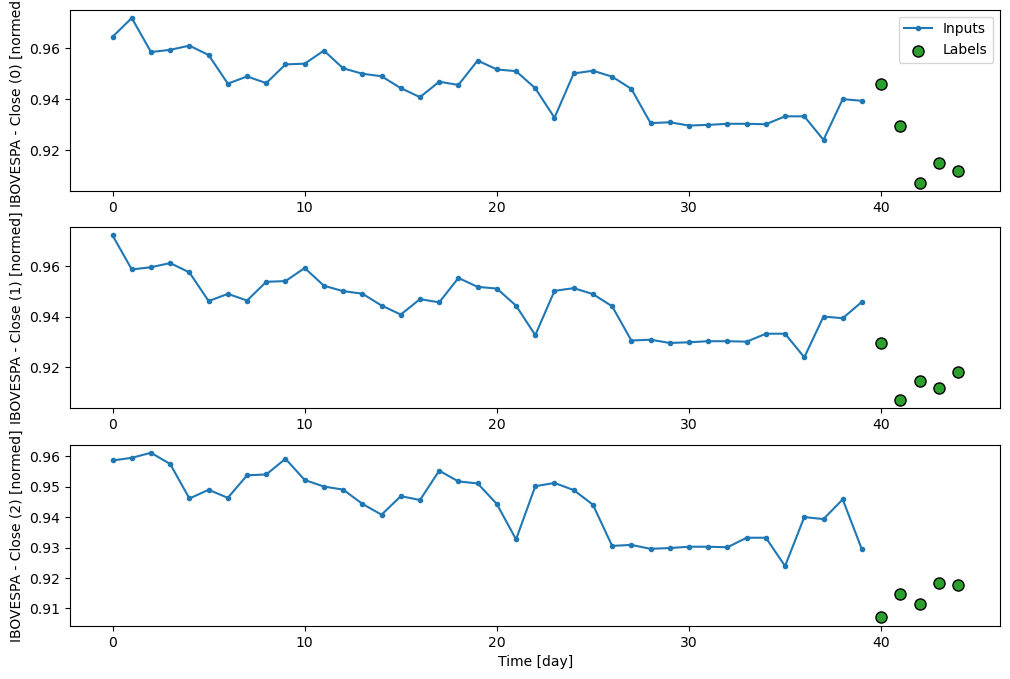

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:17 5s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.3371 - mean_squared_error: 4.4911e-05 - root_mean_squared_error: 0.0067  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.7775 - mean_squared_error: 4.7256e-05 - root_mean_squared_error: 0.0069

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.5401 - mean_squared_error: 4.7011e-05 - root_mean_squared_error: 0.0068

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 48.5614 - mean_squared_error: 5.1699e-05 - root_mean_squared_error: 0.0072

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.1151 - mean_squared_error: 5.3625e-05 - root_mean_squared_error: 0.0073

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 44.0521 - mean_squared_error: 5.4384e-05 - root_mean_squared_error: 0.0073

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 42.2592 - mean_squared_error: 5.4423e-05 - root_mean_squared_error: 0.0074

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 40.5735 - mean_squared_error: 5.3844e-05 - root_mean_squared_error: 0.0073

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 38.9917 - mean_squared_error: 5.2923e-05 - root_mean_squared_error: 0.0073

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.5232 - mean_squared_error: 5.1827e-05 - root_mean_squared_error: 0.0072

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 36.1841 - mean_squared_error: 5.0828e-05 - root_mean_squared_error: 0.0071

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.0027 - mean_squared_error: 5.0309e-05 - root_mean_squared_error: 0.0071

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 33.9538 - mean_squared_error: 5.1060e-05 - root_mean_squared_error: 0.0071

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 33.0835 - mean_squared_error: 5.3968e-05 - root_mean_squared_error: 0.0073

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.2992 - mean_squared_error: 5.6829e-05 - root_mean_squared_error: 0.0075

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.6329 - mean_squared_error: 6.0926e-05 - root_mean_squared_error: 0.0077

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 31.0354 - mean_squared_error: 6.4851e-05 - root_mean_squared_error: 0.0079

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 30.5995 - mean_squared_error: 7.0109e-05 - root_mean_squared_error: 0.0082

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.2265 - mean_squared_error: 7.5146e-05 - root_mean_squared_error: 0.0084

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 29.8919 - mean_squared_error: 8.0326e-05 - root_mean_squared_error: 0.0086

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 29.5787 - mean_squared_error: 8.5219e-05 - root_mean_squared_error: 0.0089

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.2675 - mean_squared_error: 8.9578e-05 - root_mean_squared_error: 0.0091

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.9857 - mean_squared_error: 9.7223e-05 - root_mean_squared_error: 0.0094

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.7565 - mean_squared_error: 1.0909e-04 - root_mean_squared_error: 0.0098

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.5259 - mean_squared_error: 1.1976e-04 - root_mean_squared_error: 0.0102

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 28.2891 - mean_squared_error: 1.2920e-04 - root_mean_squared_error: 0.0105

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.0507 - mean_squared_error: 1.3762e-04 - root_mean_squared_error: 0.0108

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.8156 - mean_squared_error: 1.4517e-04 - root_mean_squared_error: 0.0111

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 27.5953 - mean_squared_error: 1.5223e-04 - root_mean_squared_error: 0.0114

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.3832 - mean_squared_error: 1.5873e-04 - root_mean_squared_error: 0.0116

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.1736 - mean_squared_error: 1.6458e-04 - root_mean_squared_error: 0.0118

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 26.9667 - mean_squared_error: 1.6985e-04 - root_mean_squared_error: 0.0120

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.7790 - mean_squared_error: 1.7483e-04 - root_mean_squared_error: 0.0122

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.5993 - mean_squared_error: 1.7941e-04 - root_mean_squared_error: 0.0124

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.4196 - mean_squared_error: 1.8354e-04 - root_mean_squared_error: 0.0126

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 26.2534 - mean_squared_error: 1.8762e-04 - root_mean_squared_error: 0.0127

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 26.1043 - mean_squared_error: 1.9227e-04 - root_mean_squared_error: 0.0129

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.9764 - mean_squared_error: 1.9892e-04 - root_mean_squared_error: 0.0131

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 25.8634 - mean_squared_error: 2.0698e-04 - root_mean_squared_error: 0.0133

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.7507 - mean_squared_error: 2.1466e-04 - root_mean_squared_error: 0.0136

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.6384 - mean_squared_error: 2.2197e-04 - root_mean_squared_error: 0.0138

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.5232 - mean_squared_error: 2.2875e-04 - root_mean_squared_error: 0.0140

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 25.4064 - mean_squared_error: 2.3509e-04 - root_mean_squared_error: 0.0142

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 25.2877 - mean_squared_error: 2.4098e-04 - root_mean_squared_error: 0.0144

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.1692 - mean_squared_error: 2.4665e-04 - root_mean_squared_error: 0.0146

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 25.0550 - mean_squared_error: 2.5286e-04 - root_mean_squared_error: 0.0147

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 24.9442 - mean_squared_error: 2.5960e-04 - root_mean_squared_error: 0.0149

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 24.8385 - mean_squared_error: 2.6728e-04 - root_mean_squared_error: 0.0151

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 24.7352 - mean_squared_error: 2.7522e-04 - root_mean_squared_error: 0.0154

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 24.6329 - mean_squared_error: 2.8324e-04 - root_mean_squared_error: 0.0156

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.5324 - mean_squared_error: 2.9157e-04 - root_mean_squared_error: 0.0158

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 24.4327 - mean_squared_error: 3.0008e-04 - root_mean_squared_error: 0.0160

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.3334 - mean_squared_error: 3.0888e-04 - root_mean_squared_error: 0.0162

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.2323 - mean_squared_error: 3.1720e-04 - root_mean_squared_error: 0.0164

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 24.1302 - mean_squared_error: 3.2520e-04 - root_mean_squared_error: 0.0166

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.0289 - mean_squared_error: 3.3373e-04 - root_mean_squared_error: 0.0168

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 23.9388 - mean_squared_error: 3.4895e-04 - root_mean_squared_error: 0.0172

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 23.8643 - mean_squared_error: 3.7158e-04 - root_mean_squared_error: 0.0176

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 23.7931 - mean_squared_error: 3.9450e-04 - root_mean_squared_error: 0.0180

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 23.7238 - mean_squared_error: 4.1774e-04 - root_mean_squared_error: 0.0184

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 23.6602 - mean_squared_error: 4.4493e-04 - root_mean_squared_error: 0.0188

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 23.6039 - mean_squared_error: 4.8063e-04 - root_mean_squared_error: 0.0193

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 23.5540 - mean_squared_error: 5.2374e-04 - root_mean_squared_error: 0.0199

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 23.5077 - mean_squared_error: 5.6957e-04 - root_mean_squared_error: 0.0205

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.4625 - mean_squared_error: 6.1527e-04 - root_mean_squared_error: 0.0211

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 23.4171 - mean_squared_error: 6.5995e-04 - root_mean_squared_error: 0.0217

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.3706 - mean_squared_error: 7.0311e-04 - root_mean_squared_error: 0.0223

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.3215 - mean_squared_error: 7.4426e-04 - root_mean_squared_error: 0.0228

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 23.2711 - mean_squared_error: 7.8374e-04 - root_mean_squared_error: 0.0233

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 23.2193 - mean_squared_error: 8.2153e-04 - root_mean_squared_error: 0.0238

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 23.1678 - mean_squared_error: 8.5860e-04 - root_mean_squared_error: 0.0243

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 23.1155 - mean_squared_error: 8.9437e-04 - root_mean_squared_error: 0.0248

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 23.0617 - mean_squared_error: 9.2858e-04 - root_mean_squared_error: 0.0253

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.0063 - mean_squared_error: 9.6130e-04 - root_mean_squared_error: 0.0257

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.9499 - mean_squared_error: 9.9263e-04 - root_mean_squared_error: 0.0261

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.8937 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0265    

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.8385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0269

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 22.7821 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 22.7249 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.6677 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 22.6120 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 22.5573 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 22.5021 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 22.4468 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.3914 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0297

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 22.3371 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 22.2853 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 22.2334 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.2073 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.1558 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.1055 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.0566 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.0086 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.9619 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.9163 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 21.8720 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.8280 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 21.7834 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 21.7384 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 21.6929 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 21.6470 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 21.6006 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 21.5538 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 21.5078 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 21.4655 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 21.4242 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 21.3830 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.3426 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.3032 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 21.2649 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 21.2264 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 21.2070 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 21.1678 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.1288 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 21.1092 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 21.0699 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 21.0301 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 20.9902 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 20.9503 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0392

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 20.9110 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0395 - val_loss: 0.1155 - val_mean_absolute_error: 0.1155 - val_mean_absolute_percentage_error: 12.2734 - val_mean_squared_error: 0.0141 - val_root_mean_squared_error: 0.1188 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - mean_absolute_percentage_error: 10233.9268 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7616

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7617 - mean_absolute_error: 0.7617 - mean_absolute_percentage_error: 8565.6172 - mean_squared_error: 0.5802 - root_mean_squared_error: 0.7617  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7564 - mean_absolute_error: 0.7564 - mean_absolute_percentage_error: 7272.1660 - mean_squared_error: 0.5723 - root_mean_squared_error: 0.7565

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7480 - mean_absolute_error: 0.7480 - mean_absolute_percentage_error: 6437.6665 - mean_squared_error: 0.5603 - root_mean_squared_error: 0.7484

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 6012.2271 - mean_squared_error: 0.6352 - root_mean_squared_error: 0.7870

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7820 - mean_absolute_error: 0.7820 - mean_absolute_percentage_error: 5746.5679 - mean_squared_error: 0.7278 - root_mean_squared_error: 0.8384

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7826 - mean_absolute_error: 0.7826 - mean_absolute_percentage_error: 5368.2109 - mean_squared_error: 0.7790 - root_mean_squared_error: 0.8694

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7739 - mean_absolute_error: 0.7739 - mean_absolute_percentage_error: 5137.3701 - mean_squared_error: 0.7862 - root_mean_squared_error: 0.8750

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7605 - mean_absolute_error: 0.7605 - mean_absolute_percentage_error: 4919.7886 - mean_squared_error: 0.7817 - root_mean_squared_error: 0.8737

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7439 - mean_absolute_error: 0.7439 - mean_absolute_percentage_error: 4715.1768 - mean_squared_error: 0.7705 - root_mean_squared_error: 0.8682

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_absolute_percentage_error: 4525.9780 - mean_squared_error: 0.7558 - root_mean_squared_error: 0.8602

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7088 - mean_absolute_error: 0.7088 - mean_absolute_percentage_error: 4350.8599 - mean_squared_error: 0.7394 - root_mean_squared_error: 0.8508

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6911 - mean_absolute_error: 0.6911 - mean_absolute_percentage_error: 4188.6479 - mean_squared_error: 0.7222 - root_mean_squared_error: 0.8406

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6737 - mean_absolute_error: 0.6737 - mean_absolute_percentage_error: 4038.3191 - mean_squared_error: 0.7047 - root_mean_squared_error: 0.8299

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6568 - mean_absolute_error: 0.6568 - mean_absolute_percentage_error: 3898.7634 - mean_squared_error: 0.6875 - root_mean_squared_error: 0.8191

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6404 - mean_absolute_error: 0.6404 - mean_absolute_percentage_error: 3769.0986 - mean_squared_error: 0.6706 - root_mean_squared_error: 0.8083

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6248 - mean_absolute_error: 0.6248 - mean_absolute_percentage_error: 3648.4624 - mean_squared_error: 0.6543 - root_mean_squared_error: 0.7976

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6098 - mean_absolute_error: 0.6098 - mean_absolute_percentage_error: 3536.0684 - mean_squared_error: 0.6385 - root_mean_squared_error: 0.7871

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 3431.0632 - mean_squared_error: 0.6234 - root_mean_squared_error: 0.7769

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5817 - mean_absolute_error: 0.5817 - mean_absolute_percentage_error: 3332.7581 - mean_squared_error: 0.6089 - root_mean_squared_error: 0.7669

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5686 - mean_absolute_error: 0.5686 - mean_absolute_percentage_error: 3240.5474 - mean_squared_error: 0.5950 - root_mean_squared_error: 0.7572

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 3153.8936 - mean_squared_error: 0.5817 - root_mean_squared_error: 0.7478

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5443 - mean_absolute_error: 0.5443 - mean_absolute_percentage_error: 3072.2842 - mean_squared_error: 0.5690 - root_mean_squared_error: 0.7387

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 2995.2900 - mean_squared_error: 0.5569 - root_mean_squared_error: 0.7299

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5222 - mean_absolute_error: 0.5222 - mean_absolute_percentage_error: 2922.5078 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7213

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5119 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 2853.5984 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7130

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - mean_absolute_percentage_error: 2788.2612 - mean_squared_error: 0.5235 - root_mean_squared_error: 0.7050

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4926 - mean_absolute_error: 0.4926 - mean_absolute_percentage_error: 2726.2256 - mean_squared_error: 0.5132 - root_mean_squared_error: 0.6972

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - mean_absolute_percentage_error: 2667.2334 - mean_squared_error: 0.5035 - root_mean_squared_error: 0.6897

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2611.0867 - mean_squared_error: 0.4941 - root_mean_squared_error: 0.6824

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4665 - mean_absolute_error: 0.4665 - mean_absolute_percentage_error: 2557.5510 - mean_squared_error: 0.4850 - root_mean_squared_error: 0.6753

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4585 - mean_absolute_error: 0.4585 - mean_absolute_percentage_error: 2506.4497 - mean_squared_error: 0.4764 - root_mean_squared_error: 0.6685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 2457.6182 - mean_squared_error: 0.4681 - root_mean_squared_error: 0.6618

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 2410.9087 - mean_squared_error: 0.4600 - root_mean_squared_error: 0.6554

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 2366.1719 - mean_squared_error: 0.4523 - root_mean_squared_error: 0.6491

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2323.2759 - mean_squared_error: 0.4449 - root_mean_squared_error: 0.6430

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4228 - mean_absolute_error: 0.4228 - mean_absolute_percentage_error: 2282.1042 - mean_squared_error: 0.4377 - root_mean_squared_error: 0.6371

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 2262.1306 - mean_squared_error: 0.4342 - root_mean_squared_error: 0.6342

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 2223.3479 - mean_squared_error: 0.4274 - root_mean_squared_error: 0.6285

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4073 - mean_absolute_error: 0.4073 - mean_absolute_percentage_error: 2186.0413 - mean_squared_error: 0.4209 - root_mean_squared_error: 0.6229

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 2150.1343 - mean_squared_error: 0.4145 - root_mean_squared_error: 0.6176

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 2115.5369 - mean_squared_error: 0.4084 - root_mean_squared_error: 0.6123

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 2082.1780 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6072

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 2049.9902 - mean_squared_error: 0.3967 - root_mean_squared_error: 0.6022

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 2018.9067 - mean_squared_error: 0.3911 - root_mean_squared_error: 0.5974

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1988.8684 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.5927

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1959.8225 - mean_squared_error: 0.3805 - root_mean_squared_error: 0.5880

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1931.7186 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.5835

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1904.5131 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.5791

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1878.1632 - mean_squared_error: 0.3658 - root_mean_squared_error: 0.5748

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1852.6222 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5706

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1827.8530 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5665

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1803.8224 - mean_squared_error: 0.3522 - root_mean_squared_error: 0.5625

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1780.4957 - mean_squared_error: 0.3480 - root_mean_squared_error: 0.5586

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1757.8402 - mean_squared_error: 0.3438 - root_mean_squared_error: 0.5547

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1735.8248 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5510

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1714.4227 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5473

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1693.6190 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5437

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1673.3998 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5402

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1653.7325 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5368

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1634.5825 - mean_squared_error: 0.3212 - root_mean_squared_error: 0.5335

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1615.9266 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5302

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1606.7793 - mean_squared_error: 0.3161 - root_mean_squared_error: 0.5286

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1588.8342 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5254

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1571.3397 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5223

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1554.2765 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5192

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1537.6281 - mean_squared_error: 0.3034 - root_mean_squared_error: 0.5162

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1521.3771 - mean_squared_error: 0.3004 - root_mean_squared_error: 0.5133

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1505.5077 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5104

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1490.0090 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5076

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1474.8702 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5048

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1460.0757 - mean_squared_error: 0.2890 - root_mean_squared_error: 0.5021

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1445.6113 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.4994

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1431.4674 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.4968

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1417.6310 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.4942

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1404.0917 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4916

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1397.4302 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.4903

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1390.8392 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.4891

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1384.3181 - mean_squared_error: 0.2749 - root_mean_squared_error: 0.4879

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1377.8656 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.4866

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1371.4800 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4854

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1365.1605 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.4842

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1358.9060 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4830

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1352.7156 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4818

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1346.5883 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4806

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1340.5229 - mean_squared_error: 0.2667 - root_mean_squared_error: 0.4794

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1334.5188 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4783

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1328.5751 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4771

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1322.6909 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4760

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1316.8650 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4748

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1311.0964 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4737

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1299.7275 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4715

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1288.5775 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4693

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1277.6403 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4671

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1266.9103 - mean_squared_error: 0.2528 - root_mean_squared_error: 0.4649

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1256.3824 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4628

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1246.0492 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4608

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1235.9052 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4587

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1225.9462 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4567

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1216.1670 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4547

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1206.5625 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4527

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1197.1273 - mean_squared_error: 0.2396 - root_mean_squared_error: 0.4508

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1187.8575 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4489

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1178.7487 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4470

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1169.7963 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4452

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1160.9949 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4433

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1152.3405 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4415

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1143.8291 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4398

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1135.4573 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4380

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1127.2214 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4363

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1119.1179 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4345

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1111.1438 - mean_squared_error: 0.2232 - root_mean_squared_error: 0.4329

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1103.2988 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4312

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1095.5791 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4296

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1087.9799 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4279

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1080.4982 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4263

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1073.1315 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4248

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1065.8776 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4232

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1058.7330 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4217

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1051.6946 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4202

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1044.7599 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4187

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1037.9270 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4172

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1031.1934 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4158

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1024.5566 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4143

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1018.0145 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4129

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1011.5652 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4115

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1005.2106 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4101

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1002.0729 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4094 - val_loss: 0.1880 - val_mean_absolute_error: 0.1880 - val_mean_absolute_percentage_error: 20.0388 - val_mean_squared_error: 0.0361 - val_root_mean_squared_error: 0.1900 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.6170 - mean_absolute_error: 0.6170 - mean_absolute_percentage_error: 8291.7441 - mean_squared_error: 0.3808 - root_mean_squared_error: 0.6171

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6100 - mean_absolute_error: 0.6100 - mean_absolute_percentage_error: 6890.7305 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.6102 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5999 - mean_absolute_error: 0.5999 - mean_absolute_percentage_error: 5825.1826 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.6003

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 5140.8101 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5904

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_absolute_percentage_error: 4697.2866 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5807

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5692 - mean_absolute_error: 0.5692 - mean_absolute_percentage_error: 4366.6548 - mean_squared_error: 0.3267 - root_mean_squared_error: 0.5708

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_absolute_percentage_error: 4097.5186 - mean_squared_error: 0.3153 - root_mean_squared_error: 0.5603

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 3868.6965 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5492

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 3664.9485 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5375

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5153 - mean_absolute_error: 0.5153 - mean_absolute_percentage_error: 3482.0657 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5258

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5003 - mean_absolute_error: 0.5003 - mean_absolute_percentage_error: 3318.3130 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.5144

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4854 - mean_absolute_error: 0.4854 - mean_absolute_percentage_error: 3169.9214 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.5033

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4710 - mean_absolute_error: 0.4710 - mean_absolute_percentage_error: 3035.1108 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4928

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - mean_absolute_percentage_error: 2912.1592 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4828

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4439 - mean_absolute_error: 0.4439 - mean_absolute_percentage_error: 2799.5874 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4733

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2696.2126 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4642

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 2601.0381 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4557

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 2513.1604 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4476

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 2431.8748 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4399

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 2356.3511 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4325

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 2285.9983 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4256

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 2220.2720 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4189

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 2158.6707 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4126

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 2100.7974 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.4066

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 2046.3440 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.4008

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1994.9962 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3953

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3311 - mean_absolute_error: 0.3311 - mean_absolute_percentage_error: 1946.4817 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3900

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1900.5753 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3849

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1857.0536 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3800

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1815.7446 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3753

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1776.4792 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3708

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1739.0919 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3664

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1721.0582 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3643

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1686.2430 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3602

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1652.9983 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3562

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1621.2166 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3523

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1590.8011 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3486

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1561.6506 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3450

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1533.6803 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3415

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1506.8188 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3382

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1481.0089 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3349

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1456.1868 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3317

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1432.2875 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3287

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1409.2616 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3257

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1387.0579 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1365.6281 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3199

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1344.9313 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3172

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1324.9304 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3145

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1305.5895 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3119

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1286.8793 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3094

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1268.7655 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.3069

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1251.2159 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3045

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1234.2064 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.3021

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1217.7130 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2998

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1209.6525 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2987

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1193.8875 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2965

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1178.5778 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2944

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1171.0873 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2933

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1163.7040 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2923

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1156.4260 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2912

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1149.2538 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2902

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1142.1849 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2892

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1128.3452 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2873

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1121.5685 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2863

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1108.2856 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2844

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 1101.7764 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2835

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1095.3534 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2826

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1082.7606 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2807

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 1076.5873 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2799

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1070.4939 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2790

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1064.4781 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2781

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 1058.5387 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2773

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 1046.8826 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2756

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1041.1628 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2748

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 1035.5134 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2740

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 1024.4185 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2723

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1013.5876 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2708

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1003.0147 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2692

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 992.6903 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2677 

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 982.6030 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2662

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 972.7457 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2648

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 963.1099 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2633

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 953.6866 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2619

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 944.4677 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2606

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 935.4467 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2592

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 926.6174 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2579

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 917.9732 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2566

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 909.5078 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2553

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 901.2163 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2540

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 897.1343 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2534

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 889.0946 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2521

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 881.2148 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2509

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 873.4896 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2497

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 865.9145 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2485

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 858.4863 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2474

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 851.2015 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2462

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 844.0557 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2451

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 837.0427 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2440

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 830.1600 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2429

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 823.4042 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2418

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 816.7722 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2408

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 810.2601 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2397

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 803.8647 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2387

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 797.5830 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2377

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 791.4122 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2367

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 785.3484 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2357

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 779.3880 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2348

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 773.5285 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2338

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 767.7676 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2329

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 762.1023 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2320

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 756.5302 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2311

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 751.0486 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2302

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 745.6562 - mean_squared_error: 0.0654 - root_mean_squared_error: 0.2294

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 740.3525 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2285

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 735.1336 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2277

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 729.9972 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2269

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 724.9402 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2261

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 719.9609 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2253

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 715.0577 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2245

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 710.2288 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2237

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 707.8417 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2233

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 705.4725 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2229

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 700.7870 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2222

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 696.1706 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2214

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 691.6216 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2207

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 687.1384 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2200

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 682.7195 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2192

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 678.3639 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2185

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 674.0774 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2178 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418 - val_mean_absolute_percentage_error: 15.0891 - val_mean_squared_error: 0.0209 - val_root_mean_squared_error: 0.1445 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.6672 - mean_absolute_error: 0.6672 - mean_absolute_percentage_error: 8964.8545 - mean_squared_error: 0.4452 - root_mean_squared_error: 0.6672

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 7483.3193 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6647 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6602 - mean_absolute_error: 0.6602 - mean_absolute_percentage_error: 6351.2949 - mean_squared_error: 0.4360 - root_mean_squared_error: 0.6603

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6559 - mean_absolute_error: 0.6559 - mean_absolute_percentage_error: 5631.3955 - mean_squared_error: 0.4304 - root_mean_squared_error: 0.6560

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6514 - mean_absolute_error: 0.6514 - mean_absolute_percentage_error: 5177.7393 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6516

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6464 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 4845.8564 - mean_squared_error: 0.4184 - root_mean_squared_error: 0.6467

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6404 - mean_absolute_error: 0.6404 - mean_absolute_percentage_error: 4578.7627 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6409

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 4355.2075 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6344

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 4159.1851 - mean_squared_error: 0.3940 - root_mean_squared_error: 0.6270

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6147 - mean_absolute_error: 0.6147 - mean_absolute_percentage_error: 3980.0078 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.6183

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6040 - mean_absolute_error: 0.6040 - mean_absolute_percentage_error: 3818.1963 - mean_squared_error: 0.3738 - root_mean_squared_error: 0.6097

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5923 - mean_absolute_error: 0.5923 - mean_absolute_percentage_error: 3669.0530 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.6008

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5799 - mean_absolute_error: 0.5799 - mean_absolute_percentage_error: 3530.6775 - mean_squared_error: 0.3534 - root_mean_squared_error: 0.5916

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5671 - mean_absolute_error: 0.5671 - mean_absolute_percentage_error: 3402.3123 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5824

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5543 - mean_absolute_error: 0.5543 - mean_absolute_percentage_error: 3283.1765 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5733

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 3172.4426 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5644

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 3069.3848 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5558

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5172 - mean_absolute_error: 0.5172 - mean_absolute_percentage_error: 2973.3545 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5475

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5056 - mean_absolute_error: 0.5056 - mean_absolute_percentage_error: 2883.7183 - mean_squared_error: 0.2992 - root_mean_squared_error: 0.5394

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4944 - mean_absolute_error: 0.4944 - mean_absolute_percentage_error: 2799.9304 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5317

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4890 - mean_absolute_error: 0.4890 - mean_absolute_percentage_error: 2760.0376 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5279

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2683.9512 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5206

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 2612.4341 - mean_squared_error: 0.2742 - root_mean_squared_error: 0.5135

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2545.0662 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.5067

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2512.8323 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.5034

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 2451.0391 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4970

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 2421.4048 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4939

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4369 - mean_absolute_error: 0.4369 - mean_absolute_percentage_error: 2392.5698 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4908

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 2364.5071 - mean_squared_error: 0.2505 - root_mean_squared_error: 0.4878

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4287 - mean_absolute_error: 0.4287 - mean_absolute_percentage_error: 2337.1809 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4849

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 2284.6064 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4791

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4170 - mean_absolute_error: 0.4170 - mean_absolute_percentage_error: 2259.3071 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4763

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 2234.6328 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4736

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 2187.0718 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4682

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2141.7478 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4631

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2098.4932 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4580

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 2077.5977 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4556

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 2037.1982 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4508

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1998.5424 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4462

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1979.8407 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4440

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1943.6165 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4395

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1908.8696 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4353

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1875.4987 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4311

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1843.4193 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4271

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 1812.5583 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4232

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1782.8522 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4194

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1754.2263 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4157

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1726.6235 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4121

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1699.9880 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4086

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1687.0155 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4069

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1674.2651 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.4052

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1661.7307 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.4035

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1649.4064 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.4018

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1625.3690 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3986

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1613.6456 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3970

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1602.1119 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3955

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1590.7637 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3939

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1579.5963 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3924

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1568.6057 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3909

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1557.7866 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3894

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1547.1346 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3879

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1536.6458 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3864

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1526.3162 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3850

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1516.1427 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3836

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1506.1221 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3822

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1486.5250 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3794

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1467.4983 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3767

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1458.1898 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3754

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1439.9666 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3728

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1422.2506 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3702

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1405.0311 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3677

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1388.3008 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3653

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1372.0333 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3630

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1356.1984 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3608

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1340.7723 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3586

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1325.7374 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3564

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1318.3623 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3553

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1311.0797 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3543

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1303.8872 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3532

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1296.7831 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3522

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1289.7659 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3512

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1282.8339 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3502

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1269.2186 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3482

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1255.9247 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3462

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1242.9421 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3443

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1230.2632 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3424

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1217.8759 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3405

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1205.7667 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3387

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1193.9265 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3369

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1182.3455 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3351

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1171.0140 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3334

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1159.9247 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3317

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 1149.0690 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3300

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1138.4398 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3284

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1128.0289 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3268

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1117.8301 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3252

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1107.8365 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3236

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1098.0428 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3220

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1088.4423 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3205

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1083.7123 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3197

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1079.0282 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3190

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1074.3895 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3183

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1069.7952 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3175

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1065.2448 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3168

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1060.7380 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3161

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1056.2742 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3153

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1051.8527 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3146

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1047.4734 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3139

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1043.1350 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3132

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1038.8368 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3125

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1030.3589 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3111

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1026.1783 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3104

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1017.9320 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3091

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1009.8348 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3077

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1001.8823 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3064

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 994.0698 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3051 

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 986.3940 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3039

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 982.6060 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3032

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 978.8508 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.3026

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 971.4366 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3014

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 964.1476 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3001

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 956.9800 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2989

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 949.9308 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2977

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 942.9973 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2966

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 936.1763 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2954

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 932.8071 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2948

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 929.4650 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2943

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 922.8609 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2931

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 916.3635 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2920

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 909.9695 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2909

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 903.6755 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2899

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 897.4783 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2888

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 891.3754 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2877

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 885.3649 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2867

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 879.4445 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2857

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 873.6126 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2847

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 867.8666 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2837

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 862.2051 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2827

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 856.6256 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2817

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 851.1262 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2808

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 845.7051 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2798

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 840.3608 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2789

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 832.4946 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2775 - val_loss: 0.1727 - val_mean_absolute_error: 0.1727 - val_mean_absolute_percentage_error: 18.3993 - val_mean_squared_error: 0.0306 - val_root_mean_squared_error: 0.1750 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7545 - mean_absolute_error: 0.7545 - mean_absolute_percentage_error: 10138.2305 - mean_squared_error: 0.5693 - root_mean_squared_error: 0.7545

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_absolute_percentage_error: 8457.2256 - mean_squared_error: 0.5637 - root_mean_squared_error: 0.7508  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7449 - mean_absolute_error: 0.7449 - mean_absolute_percentage_error: 7174.3364 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7450

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7394 - mean_absolute_error: 0.7394 - mean_absolute_percentage_error: 6358.5435 - mean_squared_error: 0.5470 - root_mean_squared_error: 0.7395

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7342 - mean_absolute_error: 0.7342 - mean_absolute_percentage_error: 5845.0503 - mean_squared_error: 0.5395 - root_mean_squared_error: 0.7344

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7286 - mean_absolute_error: 0.7286 - mean_absolute_percentage_error: 5470.8418 - mean_squared_error: 0.5317 - root_mean_squared_error: 0.7290

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_absolute_percentage_error: 5171.5059 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7231

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7161 - mean_absolute_error: 0.7161 - mean_absolute_percentage_error: 4923.3257 - mean_squared_error: 0.5145 - root_mean_squared_error: 0.7168

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7090 - mean_absolute_error: 0.7090 - mean_absolute_percentage_error: 4708.6030 - mean_squared_error: 0.5052 - root_mean_squared_error: 0.7102

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7015 - mean_absolute_error: 0.7015 - mean_absolute_percentage_error: 4517.9019 - mean_squared_error: 0.4956 - root_mean_squared_error: 0.7031

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6935 - mean_absolute_error: 0.6935 - mean_absolute_percentage_error: 4345.8188 - mean_squared_error: 0.4858 - root_mean_squared_error: 0.6958

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6852 - mean_absolute_error: 0.6852 - mean_absolute_percentage_error: 4188.8481 - mean_squared_error: 0.4758 - root_mean_squared_error: 0.6883

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6764 - mean_absolute_error: 0.6764 - mean_absolute_percentage_error: 4043.6978 - mean_squared_error: 0.4657 - root_mean_squared_error: 0.6805

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6671 - mean_absolute_error: 0.6671 - mean_absolute_percentage_error: 3908.5093 - mean_squared_error: 0.4554 - root_mean_squared_error: 0.6725

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6573 - mean_absolute_error: 0.6573 - mean_absolute_percentage_error: 3782.3701 - mean_squared_error: 0.4452 - root_mean_squared_error: 0.6643

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6470 - mean_absolute_error: 0.6470 - mean_absolute_percentage_error: 3664.3059 - mean_squared_error: 0.4351 - root_mean_squared_error: 0.6561

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6363 - mean_absolute_error: 0.6363 - mean_absolute_percentage_error: 3553.5430 - mean_squared_error: 0.4251 - root_mean_squared_error: 0.6478

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6255 - mean_absolute_error: 0.6255 - mean_absolute_percentage_error: 3449.7983 - mean_squared_error: 0.4154 - root_mean_squared_error: 0.6397

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 3352.4861 - mean_squared_error: 0.4060 - root_mean_squared_error: 0.6316

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6041 - mean_absolute_error: 0.6041 - mean_absolute_percentage_error: 3260.8840 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.6238

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 3174.4834 - mean_squared_error: 0.3881 - root_mean_squared_error: 0.6161

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5831 - mean_absolute_error: 0.5831 - mean_absolute_percentage_error: 3092.9421 - mean_squared_error: 0.3797 - root_mean_squared_error: 0.6086

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5729 - mean_absolute_error: 0.5729 - mean_absolute_percentage_error: 3015.8657 - mean_squared_error: 0.3717 - root_mean_squared_error: 0.6014

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - mean_absolute_percentage_error: 2942.9163 - mean_squared_error: 0.3639 - root_mean_squared_error: 0.5943

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - mean_absolute_percentage_error: 2873.7563 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5875

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5441 - mean_absolute_error: 0.5441 - mean_absolute_percentage_error: 2808.0984 - mean_squared_error: 0.3494 - root_mean_squared_error: 0.5808

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5350 - mean_absolute_error: 0.5350 - mean_absolute_percentage_error: 2745.7095 - mean_squared_error: 0.3425 - root_mean_squared_error: 0.5744

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5262 - mean_absolute_error: 0.5262 - mean_absolute_percentage_error: 2686.3350 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5681

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5177 - mean_absolute_error: 0.5177 - mean_absolute_percentage_error: 2629.7568 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5620

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5095 - mean_absolute_error: 0.5095 - mean_absolute_percentage_error: 2575.7861 - mean_squared_error: 0.3236 - root_mean_squared_error: 0.5562

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5015 - mean_absolute_error: 0.5015 - mean_absolute_percentage_error: 2524.2463 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5504

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4937 - mean_absolute_error: 0.4937 - mean_absolute_percentage_error: 2474.9688 - mean_squared_error: 0.3121 - root_mean_squared_error: 0.5449

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2427.8135 - mean_squared_error: 0.3068 - root_mean_squared_error: 0.5395

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4789 - mean_absolute_error: 0.4789 - mean_absolute_percentage_error: 2382.6572 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5343

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2339.3621 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5292

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2297.8220 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5243

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4585 - mean_absolute_error: 0.4585 - mean_absolute_percentage_error: 2257.9280 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5195

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 2219.5688 - mean_squared_error: 0.2826 - root_mean_squared_error: 0.5148

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 2182.6509 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5102

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2147.0984 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5058

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 2112.8459 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.5015

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4285 - mean_absolute_error: 0.4285 - mean_absolute_percentage_error: 2079.8108 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4973

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 2047.9243 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4932

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4178 - mean_absolute_error: 0.4178 - mean_absolute_percentage_error: 2017.1283 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4892

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 1987.3616 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4853

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 1958.5708 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4816

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 1930.7064 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4778

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1903.7224 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4742

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1877.5808 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4707

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 1852.2424 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4672

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1827.6644 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1803.8126 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4606

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1780.6571 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4574

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 1758.1669 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4542

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1736.3115 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4511

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 1715.0607 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4481

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1694.3896 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4452

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1674.2859 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4423

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1654.7400 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4395

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1635.7227 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4368

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1617.2004 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4342

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1599.1473 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4316

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1581.5453 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4290

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1564.3784 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4265

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1547.6287 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4241

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1531.2802 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4217

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1515.3171 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4193

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1499.7249 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4170

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1484.4922 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4147

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1469.6100 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4125

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1455.0647 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4103

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1440.8408 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4082

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1426.9272 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4061

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1413.3132 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4040

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1399.9896 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4019

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1386.9471 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3999

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1374.1757 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3980

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1361.6670 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3960

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1349.4116 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3941

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1337.4025 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3922

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1325.6317 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3903

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1314.0931 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3885

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1302.7791 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3867

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1291.6820 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3849

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1280.7952 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3831

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1270.1132 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3814

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1259.6309 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3797

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1249.3434 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3780

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1239.2435 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3764

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1229.3268 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3747

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1219.5891 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3731

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1210.0251 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3716

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1200.6295 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3700

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1191.3966 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3684

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1182.3223 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3669

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1173.4017 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3654

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1168.9978 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3647

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1160.3010 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3632

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1151.7500 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3618

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1143.3397 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3603

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1135.0660 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3589

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1126.9254 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3575

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1118.9148 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3562

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1111.0312 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3548

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1103.2725 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3535

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1095.6366 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3521

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1088.1187 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3508

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1080.7159 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3495

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1073.4257 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3483

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1066.2451 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3470

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1059.1719 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3458

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1052.2032 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3446

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1045.3368 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3434

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1038.5702 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3422

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1031.9014 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3410

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1025.3276 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3398

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1018.8468 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3387

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1012.4571 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3375

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1006.1569 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3364

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 999.9561 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3353 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688 - val_mean_absolute_percentage_error: 17.9820 - val_mean_squared_error: 0.0293 - val_root_mean_squared_error: 0.1712 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7584 - mean_absolute_error: 0.7584 - mean_absolute_percentage_error: 10189.8066 - mean_squared_error: 0.5751 - root_mean_squared_error: 0.7584

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7557 - mean_absolute_error: 0.7557 - mean_absolute_percentage_error: 8508.3672 - mean_squared_error: 0.5711 - root_mean_squared_error: 0.7557  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7503 - mean_absolute_error: 0.7503 - mean_absolute_percentage_error: 7220.1919 - mean_squared_error: 0.5631 - root_mean_squared_error: 0.7503

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 6399.2588 - mean_squared_error: 0.5546 - root_mean_squared_error: 0.7447

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7386 - mean_absolute_error: 0.7386 - mean_absolute_percentage_error: 5879.7100 - mean_squared_error: 0.5461 - root_mean_squared_error: 0.7389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7319 - mean_absolute_error: 0.7319 - mean_absolute_percentage_error: 5498.4663 - mean_squared_error: 0.5367 - root_mean_squared_error: 0.7324

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7242 - mean_absolute_error: 0.7242 - mean_absolute_percentage_error: 5191.3755 - mean_squared_error: 0.5263 - root_mean_squared_error: 0.7250

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 4934.6069 - mean_squared_error: 0.5150 - root_mean_squared_error: 0.7170

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7062 - mean_absolute_error: 0.7062 - mean_absolute_percentage_error: 4710.8442 - mean_squared_error: 0.5031 - root_mean_squared_error: 0.7083

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6959 - mean_absolute_error: 0.6959 - mean_absolute_percentage_error: 4510.9351 - mean_squared_error: 0.4906 - root_mean_squared_error: 0.6990

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6848 - mean_absolute_error: 0.6848 - mean_absolute_percentage_error: 4329.6055 - mean_squared_error: 0.4779 - root_mean_squared_error: 0.6894

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6730 - mean_absolute_error: 0.6730 - mean_absolute_percentage_error: 4163.4717 - mean_squared_error: 0.4651 - root_mean_squared_error: 0.6794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6669 - mean_absolute_error: 0.6669 - mean_absolute_percentage_error: 4085.1528 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6744

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6606 - mean_absolute_error: 0.6606 - mean_absolute_percentage_error: 4009.6851 - mean_squared_error: 0.4523 - root_mean_squared_error: 0.6693

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6474 - mean_absolute_error: 0.6474 - mean_absolute_percentage_error: 3866.5806 - mean_squared_error: 0.4398 - root_mean_squared_error: 0.6591

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6338 - mean_absolute_error: 0.6338 - mean_absolute_percentage_error: 3733.2751 - mean_squared_error: 0.4276 - root_mean_squared_error: 0.6490

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6202 - mean_absolute_error: 0.6202 - mean_absolute_percentage_error: 3609.2856 - mean_squared_error: 0.4159 - root_mean_squared_error: 0.6391

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 3550.5913 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6343

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6071 - mean_absolute_error: 0.6071 - mean_absolute_percentage_error: 3493.9749 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6295

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.6007 - mean_absolute_error: 0.6007 - mean_absolute_percentage_error: 3439.3391 - mean_squared_error: 0.3993 - root_mean_squared_error: 0.6249

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5944 - mean_absolute_error: 0.5944 - mean_absolute_percentage_error: 3386.5911 - mean_squared_error: 0.3940 - root_mean_squared_error: 0.6203

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.5820 - mean_absolute_error: 0.5820 - mean_absolute_percentage_error: 3286.3608 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.6113

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 3192.5117 - mean_squared_error: 0.3742 - root_mean_squared_error: 0.6026

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5586 - mean_absolute_error: 0.5586 - mean_absolute_percentage_error: 3104.3936 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5943

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_absolute_percentage_error: 3021.4883 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5862

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 2943.3833 - mean_squared_error: 0.3480 - root_mean_squared_error: 0.5785

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5263 - mean_absolute_error: 0.5263 - mean_absolute_percentage_error: 2869.6252 - mean_squared_error: 0.3401 - root_mean_squared_error: 0.5710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5163 - mean_absolute_error: 0.5163 - mean_absolute_percentage_error: 2799.8713 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5638

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5066 - mean_absolute_error: 0.5066 - mean_absolute_percentage_error: 2733.7930 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5568

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2671.1091 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5501

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 2611.5676 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5437

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4798 - mean_absolute_error: 0.4798 - mean_absolute_percentage_error: 2554.9260 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5374

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4715 - mean_absolute_error: 0.4715 - mean_absolute_percentage_error: 2500.9873 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5314

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4635 - mean_absolute_error: 0.4635 - mean_absolute_percentage_error: 2449.5591 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5255

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4557 - mean_absolute_error: 0.4557 - mean_absolute_percentage_error: 2400.4585 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5199

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 2353.5281 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5144

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 2308.6396 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5091

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4342 - mean_absolute_error: 0.4342 - mean_absolute_percentage_error: 2265.6477 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5040

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2224.4331 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.4990

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 2184.8923 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4941

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 2146.9202 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4895

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2110.4216 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4849

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4031 - mean_absolute_error: 0.4031 - mean_absolute_percentage_error: 2075.3010 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4805

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 2041.4856 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4762

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 2008.8999 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4720

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1977.4694 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4679

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1947.1298 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4640

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 1917.8219 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4601

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1889.4956 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4564

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1862.1027 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4527

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1835.5961 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4491

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1822.6598 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4474

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1809.9280 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4456

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1785.0582 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4422

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1772.9100 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4406

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1760.9469 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4389

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1749.1643 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4373

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1737.5588 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4357

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1726.1265 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4341

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1714.8633 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4325

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1703.7650 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4309

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1692.8286 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4294

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1682.0499 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4279

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1660.9501 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4249

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1640.4379 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4220

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1620.4932 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4191

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1601.1096 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4163

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1582.2660 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4137

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1563.9303 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4111

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1546.0732 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4085

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1528.6703 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4060

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1511.7045 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4036

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1503.3805 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4024

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 1495.1592 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.4012

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1487.0386 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4000

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1479.0170 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3988

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1471.0925 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3976

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1455.5273 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3953

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1440.3282 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3931

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1425.4835 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3909

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1410.9838 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3887

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1396.8158 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3866

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1382.9645 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3845

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1369.4193 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3825

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1356.1692 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3804

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1349.6517 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3794

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1336.8267 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3775

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1324.2727 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3755

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1311.9819 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3736

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1299.9448 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3718

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1288.1534 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3699

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1276.6002 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3681

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1265.2782 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3663

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1259.7020 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3654

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1254.1809 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3645

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1248.7139 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3637

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1243.3000 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3628

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1232.6289 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3611

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1227.3701 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3603

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1217.0024 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1206.8312 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3569

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1196.8514 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3553

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1187.0553 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3537

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1177.4381 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3522

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1167.9960 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3506

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1158.7240 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3491

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1149.6171 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3476

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1140.6698 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3461

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1131.8784 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3446

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1123.2382 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3432

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1114.7451 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3418

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1106.3953 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3404

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1098.1848 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3390

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1090.1097 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3376

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1082.1664 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3363

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1074.3517 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3349

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1066.6625 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3336

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1059.0957 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3323

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1051.6505 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3311

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1044.3234 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3298

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1037.1104 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3286

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1030.0082 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3273

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1023.0140 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3261

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1016.1255 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3250

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1009.3401 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3238

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1002.6559 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3226

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 996.0700 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3215 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 989.5806 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3203

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 983.1851 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3192

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 976.8812 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3181

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 970.6670 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3170

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 964.5406 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3159

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 955.5232 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3143 - val_loss: 0.1740 - val_mean_absolute_error: 0.1740 - val_mean_absolute_percentage_error: 18.5396 - val_mean_squared_error: 0.0311 - val_root_mean_squared_error: 0.1763 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7531 - mean_absolute_error: 0.7531 - mean_absolute_percentage_error: 10119.0635 - mean_squared_error: 0.5672 - root_mean_squared_error: 0.7531

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7499 - mean_absolute_error: 0.7499 - mean_absolute_percentage_error: 8445.1914 - mean_squared_error: 0.5624 - root_mean_squared_error: 0.7499  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7443 - mean_absolute_error: 0.7443 - mean_absolute_percentage_error: 7165.2939 - mean_squared_error: 0.5541 - root_mean_squared_error: 0.7443

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7386 - mean_absolute_error: 0.7386 - mean_absolute_percentage_error: 6350.5073 - mean_squared_error: 0.5459 - root_mean_squared_error: 0.7388

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7331 - mean_absolute_error: 0.7331 - mean_absolute_percentage_error: 5836.1987 - mean_squared_error: 0.5379 - root_mean_squared_error: 0.7333

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7270 - mean_absolute_error: 0.7270 - mean_absolute_percentage_error: 5460.0273 - mean_squared_error: 0.5294 - root_mean_squared_error: 0.7274

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7201 - mean_absolute_error: 0.7201 - mean_absolute_percentage_error: 5157.9873 - mean_squared_error: 0.5200 - root_mean_squared_error: 0.7207

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_absolute_percentage_error: 4906.3862 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7135

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7042 - mean_absolute_error: 0.7042 - mean_absolute_percentage_error: 4687.7900 - mean_squared_error: 0.4993 - root_mean_squared_error: 0.7058

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 4492.9473 - mean_squared_error: 0.4882 - root_mean_squared_error: 0.6975

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6855 - mean_absolute_error: 0.6855 - mean_absolute_percentage_error: 4316.5483 - mean_squared_error: 0.4768 - root_mean_squared_error: 0.6889

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 4155.1851 - mean_squared_error: 0.4652 - root_mean_squared_error: 0.6800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6644 - mean_absolute_error: 0.6644 - mean_absolute_percentage_error: 4005.8552 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6708

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6530 - mean_absolute_error: 0.6530 - mean_absolute_percentage_error: 3866.8430 - mean_squared_error: 0.4420 - root_mean_squared_error: 0.6615

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6410 - mean_absolute_error: 0.6410 - mean_absolute_percentage_error: 3737.2029 - mean_squared_error: 0.4306 - root_mean_squared_error: 0.6522

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6287 - mean_absolute_error: 0.6287 - mean_absolute_percentage_error: 3616.0889 - mean_squared_error: 0.4196 - root_mean_squared_error: 0.6430

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6164 - mean_absolute_error: 0.6164 - mean_absolute_percentage_error: 3502.8875 - mean_squared_error: 0.4089 - root_mean_squared_error: 0.6339

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6043 - mean_absolute_error: 0.6043 - mean_absolute_percentage_error: 3397.1396 - mean_squared_error: 0.3986 - root_mean_squared_error: 0.6250

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 3298.2944 - mean_squared_error: 0.3888 - root_mean_squared_error: 0.6164

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3205.7361 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6081

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 3118.8521 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.6000

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - mean_absolute_percentage_error: 3037.0864 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5922

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5489 - mean_absolute_error: 0.5489 - mean_absolute_percentage_error: 2959.9468 - mean_squared_error: 0.3538 - root_mean_squared_error: 0.5846

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5389 - mean_absolute_error: 0.5389 - mean_absolute_percentage_error: 2887.0330 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5774

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 2818.0122 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5703

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5199 - mean_absolute_error: 0.5199 - mean_absolute_percentage_error: 2752.6025 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5635

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5109 - mean_absolute_error: 0.5109 - mean_absolute_percentage_error: 2690.5613 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5569

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5023 - mean_absolute_error: 0.5023 - mean_absolute_percentage_error: 2631.6179 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5506

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2575.5400 - mean_squared_error: 0.3119 - root_mean_squared_error: 0.5444

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2522.1101 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5385

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4784 - mean_absolute_error: 0.4784 - mean_absolute_percentage_error: 2471.1240 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5328

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2422.4241 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5272

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 2375.8606 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5218

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4567 - mean_absolute_error: 0.4567 - mean_absolute_percentage_error: 2331.2761 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5165

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2288.5347 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.5115

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - mean_absolute_percentage_error: 2247.5247 - mean_squared_error: 0.2749 - root_mean_squared_error: 0.5065

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4371 - mean_absolute_error: 0.4371 - mean_absolute_percentage_error: 2208.1367 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.5017

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2170.2781 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4971

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 2133.8660 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4926

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 2098.8115 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4882

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - mean_absolute_percentage_error: 2065.0378 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4839

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 2032.4709 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4797

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 2001.0421 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4757

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1970.6917 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4717

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 1941.3619 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4679

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 1913.0027 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4641

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1885.5679 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4605

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3788 - mean_absolute_error: 0.3788 - mean_absolute_percentage_error: 1859.0126 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4569

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1833.2885 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4534

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1808.3552 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4500

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1784.1749 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4467

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 1760.7130 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4434

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1737.9387 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4403

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1715.8209 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4372

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1694.3307 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4341

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1673.4384 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4312

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1653.1199 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4283

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1633.3618 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4254

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3363 - mean_absolute_error: 0.3363 - mean_absolute_percentage_error: 1614.1548 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4227

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1595.4705 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4200

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1577.2767 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4174

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 1559.5477 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4149

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1542.2629 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4124

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1525.4059 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4099

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3185 - mean_absolute_error: 0.3185 - mean_absolute_percentage_error: 1508.9595 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4075

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1492.9084 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4052

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1477.2380 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4029

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1461.9333 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4006

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1446.9827 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3984

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1432.3768 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3962

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1418.1025 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3940

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1404.1451 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3919

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1390.4943 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3899

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1377.1392 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3878

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1364.0695 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3858

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1351.2762 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3838

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1338.7502 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3819

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1326.4835 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3800

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1314.4667 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3781

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1302.6925 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3762

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1291.1533 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3744

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 1279.8431 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3726

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1268.7543 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3709

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1257.8789 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3691

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1247.2109 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3674

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1236.7448 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3657

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1226.4755 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3640

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1216.3987 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3624

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1206.5063 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3608

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1196.7936 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3592

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1187.2565 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1177.8904 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3561

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1168.6902 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3545

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1159.6510 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3530

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1150.7686 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3516

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1142.0386 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3501

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1133.4568 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3487

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1125.0187 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3472

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1116.7202 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3458

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1108.5579 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3444

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1100.5283 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3431

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1092.6282 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3417

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1084.8541 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3404

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1077.2031 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3391

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1069.6748 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3378

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1062.2651 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3365

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1054.9707 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3353

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1047.7878 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3340

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1044.2372 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3334

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1037.2163 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3322

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1030.3005 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3310

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1023.4875 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3298

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1016.7749 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3287

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1010.1603 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3275

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1003.6417 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3264

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 997.2164 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3252 

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 990.8824 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3241

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 984.6378 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3230

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 978.4810 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3219

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 972.4213 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3209 - val_loss: 0.1671 - val_mean_absolute_error: 0.1671 - val_mean_absolute_percentage_error: 17.7954 - val_mean_squared_error: 0.0287 - val_root_mean_squared_error: 0.1695 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7600 - mean_absolute_error: 0.7600 - mean_absolute_percentage_error: 10211.5547 - mean_squared_error: 0.5777 - root_mean_squared_error: 0.7600

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7571 - mean_absolute_error: 0.7571 - mean_absolute_percentage_error: 8524.5898 - mean_squared_error: 0.5733 - root_mean_squared_error: 0.7572  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7519 - mean_absolute_error: 0.7519 - mean_absolute_percentage_error: 7234.4507 - mean_squared_error: 0.5656 - root_mean_squared_error: 0.7520

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 6413.9785 - mean_squared_error: 0.5580 - root_mean_squared_error: 0.7469

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7418 - mean_absolute_error: 0.7418 - mean_absolute_percentage_error: 5897.6963 - mean_squared_error: 0.5508 - root_mean_squared_error: 0.7421

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7364 - mean_absolute_error: 0.7364 - mean_absolute_percentage_error: 5521.1104 - mean_squared_error: 0.5430 - root_mean_squared_error: 0.7367

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7303 - mean_absolute_error: 0.7303 - mean_absolute_percentage_error: 5219.3550 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7308

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7235 - mean_absolute_error: 0.7235 - mean_absolute_percentage_error: 4968.5718 - mean_squared_error: 0.5253 - root_mean_squared_error: 0.7243

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7160 - mean_absolute_error: 0.7160 - mean_absolute_percentage_error: 4751.0239 - mean_squared_error: 0.5155 - root_mean_squared_error: 0.7173

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7079 - mean_absolute_error: 0.7079 - mean_absolute_percentage_error: 4557.2998 - mean_squared_error: 0.5051 - root_mean_squared_error: 0.7098

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6992 - mean_absolute_error: 0.6992 - mean_absolute_percentage_error: 4382.0317 - mean_squared_error: 0.4945 - root_mean_squared_error: 0.7019

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6899 - mean_absolute_error: 0.6899 - mean_absolute_percentage_error: 4221.7778 - mean_squared_error: 0.4835 - root_mean_squared_error: 0.6937

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6801 - mean_absolute_error: 0.6801 - mean_absolute_percentage_error: 4073.4141 - mean_squared_error: 0.4725 - root_mean_squared_error: 0.6852

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6697 - mean_absolute_error: 0.6697 - mean_absolute_percentage_error: 3935.1899 - mean_squared_error: 0.4614 - root_mean_squared_error: 0.6765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6588 - mean_absolute_error: 0.6588 - mean_absolute_percentage_error: 3806.2493 - mean_squared_error: 0.4503 - root_mean_squared_error: 0.6677

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6476 - mean_absolute_error: 0.6476 - mean_absolute_percentage_error: 3685.8308 - mean_squared_error: 0.4395 - root_mean_squared_error: 0.6589

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6360 - mean_absolute_error: 0.6360 - mean_absolute_percentage_error: 3572.9365 - mean_squared_error: 0.4289 - root_mean_squared_error: 0.6502

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6244 - mean_absolute_error: 0.6244 - mean_absolute_percentage_error: 3466.9944 - mean_squared_error: 0.4187 - root_mean_squared_error: 0.6415

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6128 - mean_absolute_error: 0.6128 - mean_absolute_percentage_error: 3367.6255 - mean_squared_error: 0.4088 - root_mean_squared_error: 0.6331

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 3274.4102 - mean_squared_error: 0.3993 - root_mean_squared_error: 0.6249

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5905 - mean_absolute_error: 0.5905 - mean_absolute_percentage_error: 3186.8359 - mean_squared_error: 0.3902 - root_mean_squared_error: 0.6170

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5800 - mean_absolute_error: 0.5800 - mean_absolute_percentage_error: 3104.4045 - mean_squared_error: 0.3815 - root_mean_squared_error: 0.6093

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5698 - mean_absolute_error: 0.5698 - mean_absolute_percentage_error: 3026.6477 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.6018

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5599 - mean_absolute_error: 0.5599 - mean_absolute_percentage_error: 2953.1538 - mean_squared_error: 0.3653 - root_mean_squared_error: 0.5946

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5504 - mean_absolute_error: 0.5504 - mean_absolute_percentage_error: 2883.5354 - mean_squared_error: 0.3577 - root_mean_squared_error: 0.5876

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5412 - mean_absolute_error: 0.5412 - mean_absolute_percentage_error: 2817.4629 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5808

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 2754.7000 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5742

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - mean_absolute_percentage_error: 2695.0176 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5679

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - mean_absolute_percentage_error: 2638.2124 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5617

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2584.0925 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5557

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4995 - mean_absolute_error: 0.4995 - mean_absolute_percentage_error: 2532.4561 - mean_squared_error: 0.3183 - root_mean_squared_error: 0.5500

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 2483.0930 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5444

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4847 - mean_absolute_error: 0.4847 - mean_absolute_percentage_error: 2435.8428 - mean_squared_error: 0.3071 - root_mean_squared_error: 0.5389

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2390.5730 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5336

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4707 - mean_absolute_error: 0.4707 - mean_absolute_percentage_error: 2347.1699 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5285

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 2305.5183 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5235

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4576 - mean_absolute_error: 0.4576 - mean_absolute_percentage_error: 2265.5090 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5187

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4513 - mean_absolute_error: 0.4513 - mean_absolute_percentage_error: 2227.0396 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5140

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2190.0215 - mean_squared_error: 0.2783 - root_mean_squared_error: 0.5094

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 2154.3677 - mean_squared_error: 0.2741 - root_mean_squared_error: 0.5049

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 2120.0095 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.5006

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 2086.8730 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4964

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4228 - mean_absolute_error: 0.4228 - mean_absolute_percentage_error: 2054.8860 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4922

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2023.9863 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4882

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4124 - mean_absolute_error: 0.4124 - mean_absolute_percentage_error: 1994.1163 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4843

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 1965.2277 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4805

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 1937.2742 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4768

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1910.2107 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4731

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1883.9889 - mean_squared_error: 0.2416 - root_mean_squared_error: 0.4696

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 1858.5669 - mean_squared_error: 0.2385 - root_mean_squared_error: 0.4661

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3848 - mean_absolute_error: 0.3848 - mean_absolute_percentage_error: 1833.9069 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4627

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3806 - mean_absolute_error: 0.3806 - mean_absolute_percentage_error: 1809.9738 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4594

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1786.7365 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4562

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1764.1638 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4530

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3687 - mean_absolute_error: 0.3687 - mean_absolute_percentage_error: 1742.2268 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4499

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1720.8962 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4469

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1700.1475 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4439

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1679.9666 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4410

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1660.3435 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4382

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 1641.2501 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4355

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1622.6543 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4328

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1604.5302 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4302

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1586.8577 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4276

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1569.6202 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4251

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1552.8004 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4226

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1536.3828 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4202

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1520.3528 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4178

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1504.6947 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4155

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1489.3966 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4132

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1474.4495 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4109

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1459.8398 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4087

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1445.5532 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4066

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1431.5792 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4044

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1417.9067 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4023

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1404.5248 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4003

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1391.4244 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3982

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1378.5963 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3962

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1366.0321 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3942

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1353.7227 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3923

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1341.6605 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3904

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1329.8379 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3885

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1318.2485 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3867

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1306.8846 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3848

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1295.7389 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3830

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1284.8047 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3813

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1274.0762 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3795

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1263.5487 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3778

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1253.2173 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3761

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1243.0741 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3744

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1233.1145 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3728

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1223.3345 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3712

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1213.7291 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3696

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1204.2933 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3680

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1195.0220 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3665

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1185.9109 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3649

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1176.9558 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3634

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1168.1522 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3619

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1159.4954 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3605

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1150.9812 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3590

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1142.6062 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3576

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1134.3669 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1126.2599 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3548

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1118.2817 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3534

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1110.4293 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3521

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1102.7023 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3507

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1095.0967 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3494

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1087.6090 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3481

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1080.2355 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3468

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1072.9729 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3456

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1065.8190 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3443

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1058.7714 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3431

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1051.8278 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3419

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1044.9856 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3407

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1038.2427 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3395

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1031.5966 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3383

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1025.0449 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3372

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1018.5857 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3360

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1012.2171 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3349

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1005.9410 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3338

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1002.8421 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3332 - val_loss: 0.1669 - val_mean_absolute_error: 0.1669 - val_mean_absolute_percentage_error: 17.7812 - val_mean_squared_error: 0.0287 - val_root_mean_squared_error: 0.1693 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7602 - mean_absolute_error: 0.7602 - mean_absolute_percentage_error: 10213.6621 - mean_squared_error: 0.5778 - root_mean_squared_error: 0.7602

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7572 - mean_absolute_error: 0.7572 - mean_absolute_percentage_error: 8526.1230 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7572  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7521 - mean_absolute_error: 0.7521 - mean_absolute_percentage_error: 7235.8838 - mean_squared_error: 0.5657 - root_mean_squared_error: 0.7521

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7471 - mean_absolute_error: 0.7471 - mean_absolute_percentage_error: 6415.6802 - mean_squared_error: 0.5584 - root_mean_squared_error: 0.7472

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 5900.1729 - mean_squared_error: 0.5514 - root_mean_squared_error: 0.7425

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 5524.6221 - mean_squared_error: 0.5440 - root_mean_squared_error: 0.7374

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7313 - mean_absolute_error: 0.7313 - mean_absolute_percentage_error: 5224.0273 - mean_squared_error: 0.5359 - root_mean_squared_error: 0.7318

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 4974.5312 - mean_squared_error: 0.5271 - root_mean_squared_error: 0.7256

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7178 - mean_absolute_error: 0.7178 - mean_absolute_percentage_error: 4758.3130 - mean_squared_error: 0.5178 - root_mean_squared_error: 0.7190

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_absolute_percentage_error: 4565.9102 - mean_squared_error: 0.5079 - root_mean_squared_error: 0.7119

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7020 - mean_absolute_error: 0.7020 - mean_absolute_percentage_error: 4391.9360 - mean_squared_error: 0.4977 - root_mean_squared_error: 0.7043

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_absolute_percentage_error: 4232.9385 - mean_squared_error: 0.4873 - root_mean_squared_error: 0.6965

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6839 - mean_absolute_error: 0.6839 - mean_absolute_percentage_error: 4085.7351 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6884

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6741 - mean_absolute_error: 0.6741 - mean_absolute_percentage_error: 3948.5583 - mean_squared_error: 0.4659 - root_mean_squared_error: 0.6801

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6638 - mean_absolute_error: 0.6638 - mean_absolute_percentage_error: 3820.5964 - mean_squared_error: 0.4552 - root_mean_squared_error: 0.6716

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6533 - mean_absolute_error: 0.6533 - mean_absolute_percentage_error: 3701.1406 - mean_squared_error: 0.4446 - root_mean_squared_error: 0.6631

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6424 - mean_absolute_error: 0.6424 - mean_absolute_percentage_error: 3589.1724 - mean_squared_error: 0.4343 - root_mean_squared_error: 0.6547

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6313 - mean_absolute_error: 0.6313 - mean_absolute_percentage_error: 3483.9958 - mean_squared_error: 0.4242 - root_mean_squared_error: 0.6463

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6201 - mean_absolute_error: 0.6201 - mean_absolute_percentage_error: 3385.1013 - mean_squared_error: 0.4145 - root_mean_squared_error: 0.6380

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 3292.1938 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6300

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5983 - mean_absolute_error: 0.5983 - mean_absolute_percentage_error: 3204.8579 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6222

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5880 - mean_absolute_error: 0.5880 - mean_absolute_percentage_error: 3122.6458 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6146

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5780 - mean_absolute_error: 0.5780 - mean_absolute_percentage_error: 3045.1130 - mean_squared_error: 0.3792 - root_mean_squared_error: 0.6072

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5684 - mean_absolute_error: 0.5684 - mean_absolute_percentage_error: 2971.8430 - mean_squared_error: 0.3713 - root_mean_squared_error: 0.6001

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - mean_absolute_percentage_error: 2902.4619 - mean_squared_error: 0.3637 - root_mean_squared_error: 0.5932

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5503 - mean_absolute_error: 0.5503 - mean_absolute_percentage_error: 2836.6338 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5865

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 2774.0430 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5801

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 2714.4473 - mean_squared_error: 0.3429 - root_mean_squared_error: 0.5738

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 2657.6755 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5677

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 2603.5652 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5618

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2551.9351 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5560

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5020 - mean_absolute_error: 0.5020 - mean_absolute_percentage_error: 2502.5840 - mean_squared_error: 0.3187 - root_mean_squared_error: 0.5505

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - mean_absolute_percentage_error: 2455.3530 - mean_squared_error: 0.3132 - root_mean_squared_error: 0.5451

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - mean_absolute_percentage_error: 2410.0984 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5398

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4810 - mean_absolute_error: 0.4810 - mean_absolute_percentage_error: 2366.6953 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5347

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - mean_absolute_percentage_error: 2325.0496 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5297

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4681 - mean_absolute_error: 0.4681 - mean_absolute_percentage_error: 2285.0630 - mean_squared_error: 0.2932 - root_mean_squared_error: 0.5249

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 2246.6345 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5202

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4561 - mean_absolute_error: 0.4561 - mean_absolute_percentage_error: 2209.6707 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.5157

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4503 - mean_absolute_error: 0.4503 - mean_absolute_percentage_error: 2174.0774 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5112

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 2139.7627 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.5069

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 2106.6489 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5027

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 2074.6704 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4986

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 2043.7703 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4946

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - mean_absolute_percentage_error: 2013.8973 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4907

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 1984.9950 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4869

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - mean_absolute_percentage_error: 1957.0170 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4832

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 1929.9221 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4796

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4053 - mean_absolute_error: 0.4053 - mean_absolute_percentage_error: 1903.6641 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4760

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1878.2006 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4726

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 1853.4958 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4692

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 1829.5138 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4659

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 1806.2230 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4626

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 1783.5925 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4594

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1761.5935 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4563

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1740.1978 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4533

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3732 - mean_absolute_error: 0.3732 - mean_absolute_percentage_error: 1719.3810 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4503

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1699.1301 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4474

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 1679.4349 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4446

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1660.2668 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4419

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1641.5941 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4392

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1623.3912 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4366

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1605.6390 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4340

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1588.3214 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4315

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1571.4208 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4290

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1554.9221 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4265

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1538.8104 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4241

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1523.0703 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4218

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1507.6898 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4195

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1492.6600 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4172

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1477.9680 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4150

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1463.5990 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4128

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1449.5428 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4107

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1435.7886 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4085

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1422.3247 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4065

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1409.1426 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4044

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1396.2327 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4024

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1383.5867 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4004

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1371.1957 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3985

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1359.0521 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3965

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1347.1483 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3946

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1335.4779 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3928

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1324.0331 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3909

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1312.8070 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3891

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1301.7928 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3873

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1290.9847 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3856

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1280.3781 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3838

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1269.9675 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3821

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1259.7458 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3804

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1249.7085 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3788

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1239.8512 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3771

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1230.1692 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3755

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1220.6573 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3739

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1211.3104 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3724

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1202.1244 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3708

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1193.0948 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3693

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1184.2174 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3678

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1175.4873 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3663

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1166.9004 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3649

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1158.4532 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3634

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1150.1425 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3620

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1141.9645 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3606

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1133.9159 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3592

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1125.9938 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3578

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1118.1975 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3565

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1110.5232 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1102.9673 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3538

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1095.5261 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3526

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1088.1964 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3513

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1080.9760 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3500

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1073.8623 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3488

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1066.8534 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3475

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1059.9463 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3463

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1053.1392 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3451

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1046.4294 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3439

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1039.8146 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3428

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1033.2927 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3416

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1026.8621 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3405

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1017.3951 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3388 - val_loss: 0.1710 - val_mean_absolute_error: 0.1710 - val_mean_absolute_percentage_error: 18.2155 - val_mean_squared_error: 0.0300 - val_root_mean_squared_error: 0.1733 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7561 - mean_absolute_error: 0.7561 - mean_absolute_percentage_error: 10159.3906 - mean_squared_error: 0.5717 - root_mean_squared_error: 0.7561

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 8477.5869 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7528  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7472 - mean_absolute_error: 0.7472 - mean_absolute_percentage_error: 7193.1060 - mean_squared_error: 0.5585 - root_mean_squared_error: 0.7473

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7420 - mean_absolute_error: 0.7420 - mean_absolute_percentage_error: 6376.5449 - mean_squared_error: 0.5508 - root_mean_squared_error: 0.7421

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 5863.1304 - mean_squared_error: 0.5437 - root_mean_squared_error: 0.7373

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 5489.1724 - mean_squared_error: 0.5362 - root_mean_squared_error: 0.7321

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 5190.0171 - mean_squared_error: 0.5281 - root_mean_squared_error: 0.7264

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 4941.8936 - mean_squared_error: 0.5194 - root_mean_squared_error: 0.7203

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7126 - mean_absolute_error: 0.7126 - mean_absolute_percentage_error: 4727.0332 - mean_squared_error: 0.5102 - root_mean_squared_error: 0.7137

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7051 - mean_absolute_error: 0.7051 - mean_absolute_percentage_error: 4535.9819 - mean_squared_error: 0.5006 - root_mean_squared_error: 0.7067

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6971 - mean_absolute_error: 0.6971 - mean_absolute_percentage_error: 4363.3491 - mean_squared_error: 0.4907 - root_mean_squared_error: 0.6993

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 4205.6763 - mean_squared_error: 0.4805 - root_mean_squared_error: 0.6917

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6795 - mean_absolute_error: 0.6795 - mean_absolute_percentage_error: 4059.7595 - mean_squared_error: 0.4701 - root_mean_squared_error: 0.6838

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6700 - mean_absolute_error: 0.6700 - mean_absolute_percentage_error: 3923.8167 - mean_squared_error: 0.4597 - root_mean_squared_error: 0.6756

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6600 - mean_absolute_error: 0.6600 - mean_absolute_percentage_error: 3797.0488 - mean_squared_error: 0.4493 - root_mean_squared_error: 0.6673

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6498 - mean_absolute_error: 0.6498 - mean_absolute_percentage_error: 3678.7664 - mean_squared_error: 0.4390 - root_mean_squared_error: 0.6590

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6393 - mean_absolute_error: 0.6393 - mean_absolute_percentage_error: 3567.9417 - mean_squared_error: 0.4290 - root_mean_squared_error: 0.6507

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 3463.8997 - mean_squared_error: 0.4191 - root_mean_squared_error: 0.6425

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6177 - mean_absolute_error: 0.6177 - mean_absolute_percentage_error: 3366.0662 - mean_squared_error: 0.4096 - root_mean_squared_error: 0.6345

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6069 - mean_absolute_error: 0.6069 - mean_absolute_percentage_error: 3274.0378 - mean_squared_error: 0.4004 - root_mean_squared_error: 0.6265

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5964 - mean_absolute_error: 0.5964 - mean_absolute_percentage_error: 3187.4773 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6188

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 3105.9746 - mean_squared_error: 0.3832 - root_mean_squared_error: 0.6114

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5765 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 3029.1074 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.6041

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5672 - mean_absolute_error: 0.5672 - mean_absolute_percentage_error: 2956.4678 - mean_squared_error: 0.3673 - root_mean_squared_error: 0.5971

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5581 - mean_absolute_error: 0.5581 - mean_absolute_percentage_error: 2887.6936 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5903

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5494 - mean_absolute_error: 0.5494 - mean_absolute_percentage_error: 2822.4543 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5837

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 2760.4404 - mean_squared_error: 0.3459 - root_mean_squared_error: 0.5773

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5327 - mean_absolute_error: 0.5327 - mean_absolute_percentage_error: 2701.3882 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5711

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5247 - mean_absolute_error: 0.5247 - mean_absolute_percentage_error: 2645.0994 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5651

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5169 - mean_absolute_error: 0.5169 - mean_absolute_percentage_error: 2591.4282 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5593

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2540.2080 - mean_squared_error: 0.3212 - root_mean_squared_error: 0.5536

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 2491.2476 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5481

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4950 - mean_absolute_error: 0.4950 - mean_absolute_percentage_error: 2444.3979 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5428

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4882 - mean_absolute_error: 0.4882 - mean_absolute_percentage_error: 2399.5242 - mean_squared_error: 0.3050 - root_mean_squared_error: 0.5376

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 2356.4724 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5325

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4750 - mean_absolute_error: 0.4750 - mean_absolute_percentage_error: 2315.1436 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5276

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4688 - mean_absolute_error: 0.4688 - mean_absolute_percentage_error: 2275.4514 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5229

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - mean_absolute_percentage_error: 2237.3022 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5182

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4569 - mean_absolute_error: 0.4569 - mean_absolute_percentage_error: 2200.6057 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5137

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 2165.2715 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5093

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2131.2100 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.5051

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 2098.3435 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.5009

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4353 - mean_absolute_error: 0.4353 - mean_absolute_percentage_error: 2066.6018 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4968

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 2035.9250 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4929

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2006.2661 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4890

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 1977.5696 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4852

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 1949.7848 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4816

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1922.8710 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4780

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 1896.7834 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4744

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 1871.4818 - mean_squared_error: 0.2421 - root_mean_squared_error: 0.4710

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 1846.9318 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4676

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1823.0988 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 1799.9523 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4611

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 1777.4615 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4580

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 1755.5979 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4549

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1734.3323 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4519

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1713.6407 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4490

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3714 - mean_absolute_error: 0.3714 - mean_absolute_percentage_error: 1693.5106 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4461

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 1673.9327 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4433

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1654.8796 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4406

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1636.3197 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4379

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3586 - mean_absolute_error: 0.3586 - mean_absolute_percentage_error: 1618.2274 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4353

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3556 - mean_absolute_error: 0.3556 - mean_absolute_percentage_error: 1600.5808 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4328

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1583.3633 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4303

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1566.5585 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4278

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1550.1514 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4254

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1534.1277 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4231

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1518.4728 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4207

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1503.1744 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4184

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 1488.2236 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4162

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1473.6075 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4140

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1459.3116 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4118

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1445.3258 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4097

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1431.6392 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4076

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1418.2410 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4055

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1405.1226 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4035

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1392.2747 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4015

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1379.6893 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3995

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1367.3571 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3976

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1355.2709 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3957

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1343.4231 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3938

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1331.8074 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3919

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1320.4160 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3901

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1309.2417 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3883

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1298.2782 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3865

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1287.5195 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3848

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1276.9609 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3831

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1266.5978 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3814

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1256.4222 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3797

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1246.4294 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3780

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1236.6155 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3764

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1226.9756 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3748

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1217.5049 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3732

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1208.1981 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3717

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1199.0516 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3701

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1190.0607 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3686

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1181.2213 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3671

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1172.5283 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3657

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1163.9777 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3642

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1155.5663 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3628

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1147.2905 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3614

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1139.1470 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3600

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1131.1320 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3586

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1123.2428 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3572

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1115.4788 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1107.8361 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3546

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1100.3112 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3533

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1092.9003 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3520

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1085.6002 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3507

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1078.4089 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3495

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1071.3237 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3482

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1064.3428 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3470

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1057.4633 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3458

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1050.6830 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3446

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1043.9996 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3434

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1037.4108 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3423

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1027.7003 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3405

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1021.3394 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3394

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1015.0785 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3383 - val_loss: 0.1724 - val_mean_absolute_error: 0.1724 - val_mean_absolute_percentage_error: 18.3693 - val_mean_squared_error: 0.0305 - val_root_mean_squared_error: 0.1748 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7546 - mean_absolute_error: 0.7546 - mean_absolute_percentage_error: 10139.5449 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7546

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7511 - mean_absolute_error: 0.7511 - mean_absolute_percentage_error: 8459.3623 - mean_squared_error: 0.5641 - root_mean_squared_error: 0.7511  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7454 - mean_absolute_error: 0.7454 - mean_absolute_percentage_error: 7176.9272 - mean_squared_error: 0.5558 - root_mean_squared_error: 0.7455

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 6361.7529 - mean_squared_error: 0.5480 - root_mean_squared_error: 0.7402

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7351 - mean_absolute_error: 0.7351 - mean_absolute_percentage_error: 5849.2686 - mean_squared_error: 0.5409 - root_mean_squared_error: 0.7353

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7299 - mean_absolute_error: 0.7299 - mean_absolute_percentage_error: 5476.1304 - mean_squared_error: 0.5334 - root_mean_squared_error: 0.7302

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7241 - mean_absolute_error: 0.7241 - mean_absolute_percentage_error: 5177.7856 - mean_squared_error: 0.5254 - root_mean_squared_error: 0.7246

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7178 - mean_absolute_error: 0.7178 - mean_absolute_percentage_error: 4930.4946 - mean_squared_error: 0.5169 - root_mean_squared_error: 0.7185

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7110 - mean_absolute_error: 0.7110 - mean_absolute_percentage_error: 4716.4849 - mean_squared_error: 0.5079 - root_mean_squared_error: 0.7121

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7036 - mean_absolute_error: 0.7036 - mean_absolute_percentage_error: 4526.2891 - mean_squared_error: 0.4984 - root_mean_squared_error: 0.7052

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6958 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 4354.5098 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6980

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6875 - mean_absolute_error: 0.6875 - mean_absolute_percentage_error: 4197.6807 - mean_squared_error: 0.4788 - root_mean_squared_error: 0.6905

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6787 - mean_absolute_error: 0.6787 - mean_absolute_percentage_error: 4052.5725 - mean_squared_error: 0.4687 - root_mean_squared_error: 0.6827

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6695 - mean_absolute_error: 0.6695 - mean_absolute_percentage_error: 3917.3914 - mean_squared_error: 0.4584 - root_mean_squared_error: 0.6748

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 3791.3552 - mean_squared_error: 0.4483 - root_mean_squared_error: 0.6667

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6499 - mean_absolute_error: 0.6499 - mean_absolute_percentage_error: 3673.7949 - mean_squared_error: 0.4382 - root_mean_squared_error: 0.6585

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6397 - mean_absolute_error: 0.6397 - mean_absolute_percentage_error: 3563.6750 - mean_squared_error: 0.4283 - root_mean_squared_error: 0.6504

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6293 - mean_absolute_error: 0.6293 - mean_absolute_percentage_error: 3460.3413 - mean_squared_error: 0.4186 - root_mean_squared_error: 0.6423

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6188 - mean_absolute_error: 0.6188 - mean_absolute_percentage_error: 3363.2083 - mean_squared_error: 0.4093 - root_mean_squared_error: 0.6344

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6082 - mean_absolute_error: 0.6082 - mean_absolute_percentage_error: 3271.6973 - mean_squared_error: 0.4002 - root_mean_squared_error: 0.6266

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 3185.5430 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.6190

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5879 - mean_absolute_error: 0.5879 - mean_absolute_percentage_error: 3104.3752 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.6116

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 3027.7981 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.6044

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5689 - mean_absolute_error: 0.5689 - mean_absolute_percentage_error: 2955.4197 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5974

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5600 - mean_absolute_error: 0.5600 - mean_absolute_percentage_error: 2886.8882 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.5907

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5514 - mean_absolute_error: 0.5514 - mean_absolute_percentage_error: 2821.8801 - mean_squared_error: 0.3530 - root_mean_squared_error: 0.5842

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5430 - mean_absolute_error: 0.5430 - mean_absolute_percentage_error: 2760.0923 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5778

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - mean_absolute_percentage_error: 2701.2581 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5717

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5269 - mean_absolute_error: 0.5269 - mean_absolute_percentage_error: 2645.1504 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5657

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5192 - mean_absolute_error: 0.5192 - mean_absolute_percentage_error: 2591.6287 - mean_squared_error: 0.3274 - root_mean_squared_error: 0.5599

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5117 - mean_absolute_error: 0.5117 - mean_absolute_percentage_error: 2540.5356 - mean_squared_error: 0.3216 - root_mean_squared_error: 0.5543

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2491.6892 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5488

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 2444.9463 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5435

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - mean_absolute_percentage_error: 2400.1782 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5383

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4840 - mean_absolute_error: 0.4840 - mean_absolute_percentage_error: 2357.2283 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5333

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4775 - mean_absolute_error: 0.4775 - mean_absolute_percentage_error: 2315.9802 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5284

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - mean_absolute_percentage_error: 2276.3513 - mean_squared_error: 0.2910 - root_mean_squared_error: 0.5237

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - mean_absolute_percentage_error: 2238.2515 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 2201.5940 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5146

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2166.2903 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.5102

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4481 - mean_absolute_error: 0.4481 - mean_absolute_percentage_error: 2132.2517 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5059

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 2099.4026 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.5018

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2067.6743 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4977

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 2037.0101 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4938

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2007.3627 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4899

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 1978.6759 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4861

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 1950.9000 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4825

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 1923.9949 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4789

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 1897.9156 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4754

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 1872.6218 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4719

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 1848.0786 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4686

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 1824.2512 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4653

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 1801.1091 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4621

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3881 - mean_absolute_error: 0.3881 - mean_absolute_percentage_error: 1778.6215 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4589

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 1756.7599 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4558

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3805 - mean_absolute_error: 0.3805 - mean_absolute_percentage_error: 1735.4956 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4528

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1714.8051 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4499

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 1694.6752 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4470

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3699 - mean_absolute_error: 0.3699 - mean_absolute_percentage_error: 1675.0972 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4442

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1656.0431 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4415

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1637.4818 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4389

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3603 - mean_absolute_error: 0.3603 - mean_absolute_percentage_error: 1619.3875 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4363

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1601.7386 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4337

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1584.5189 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4312

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1567.7117 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4287

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3485 - mean_absolute_error: 0.3485 - mean_absolute_percentage_error: 1551.3020 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4263

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1535.2756 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4240

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1519.6177 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4216

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1504.3164 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4193

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1489.3625 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4171

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1474.7434 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4149

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1460.4442 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4127

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1446.4552 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4106

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 1432.7653 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4085

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1419.3639 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4064

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1406.2421 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4044

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1393.3907 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4023

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1380.8018 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4004

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1368.4659 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3984

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1356.3760 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3965

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1344.5243 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3946

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1332.9047 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3928

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1321.5095 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3909

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1310.3313 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3891

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1299.3638 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3874

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1288.6011 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3856

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1278.0383 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3839

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1267.6711 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3822

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1257.4915 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3805

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1247.4946 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3789

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1237.6765 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3772

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1228.0326 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3756

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1218.5576 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3740

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1209.2468 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3725

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1200.0962 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3709

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2833 - mean_absolute_error: 0.2833 - mean_absolute_percentage_error: 1191.1013 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3694

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1182.2579 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3679

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1173.5609 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3665

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1165.0065 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3650

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1156.5912 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3636

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1148.3116 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3622

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1140.1643 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3608

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1132.1456 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3594

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1124.2528 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3580

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1116.4851 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3567

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1108.8387 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1101.3099 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3541

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1093.8953 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3528

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1086.5916 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3515

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1079.3966 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3502

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1072.3077 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3490

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1065.3231 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3478

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1058.4398 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3466

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1051.6560 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3454

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1044.9690 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3442

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1038.3766 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3430

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1031.8766 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3419

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1025.4674 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3407

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1019.1509 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3396

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1016.0319 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3390 - val_loss: 0.1710 - val_mean_absolute_error: 0.1710 - val_mean_absolute_percentage_error: 18.2115 - val_mean_squared_error: 0.0300 - val_root_mean_squared_error: 0.1733 - lr: 0.0076


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:29s:877ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:45:04.482302: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:43:21',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:29s:877ms',
 'TRAINING_EPOCHS': 11,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:45:04.733459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.7561 - mean_absolute_error: 0.7561 - mean_absolute_percentage_error: 10159.3320 - mean_squared_error: 0.5717 - root_mean_squared_error: 0.7561

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 6749.1357 - mean_squared_error: 0.5591 - root_mean_squared_error: 0.7477  

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7442 - mean_absolute_error: 0.7442 - mean_absolute_percentage_error: 5537.6367 - mean_squared_error: 0.5539 - root_mean_squared_error: 0.7442

 15/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7427 - mean_absolute_error: 0.7427 - mean_absolute_percentage_error: 5030.4238 - mean_squared_error: 0.5517 - root_mean_squared_error: 0.7428

 20/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7411 - mean_absolute_error: 0.7411 - mean_absolute_percentage_error: 4587.4756 - mean_squared_error: 0.5494 - root_mean_squared_error: 0.7412

 24/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7397 - mean_absolute_error: 0.7397 - mean_absolute_percentage_error: 4309.1113 - mean_squared_error: 0.5472 - root_mean_squared_error: 0.7397

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7372 - mean_absolute_error: 0.7372 - mean_absolute_percentage_error: 4013.6394 - mean_squared_error: 0.5437 - root_mean_squared_error: 0.7373

 34/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7346 - mean_absolute_error: 0.7346 - mean_absolute_percentage_error: 3766.6045 - mean_squared_error: 0.5400 - root_mean_squared_error: 0.7348

 38/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 3600.8965 - mean_squared_error: 0.5374 - root_mean_squared_error: 0.7330

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7308 - mean_absolute_error: 0.7308 - mean_absolute_percentage_error: 3423.1665 - mean_squared_error: 0.5344 - root_mean_squared_error: 0.7309

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7286 - mean_absolute_error: 0.7286 - mean_absolute_percentage_error: 3267.4507 - mean_squared_error: 0.5314 - root_mean_squared_error: 0.7288

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_absolute_percentage_error: 3128.4468 - mean_squared_error: 0.5281 - root_mean_squared_error: 0.7266

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7240 - mean_absolute_error: 0.7240 - mean_absolute_percentage_error: 3004.2021 - mean_squared_error: 0.5249 - root_mean_squared_error: 0.7243

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7219 - mean_absolute_error: 0.7219 - mean_absolute_percentage_error: 2893.4802 - mean_squared_error: 0.5219 - root_mean_squared_error: 0.7222

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7203 - mean_absolute_error: 0.7203 - mean_absolute_percentage_error: 2813.5444 - mean_squared_error: 0.5197 - root_mean_squared_error: 0.7207

 72/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 2723.3569 - mean_squared_error: 0.5173 - root_mean_squared_error: 0.7190

 77/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7170 - mean_absolute_error: 0.7170 - mean_absolute_percentage_error: 2641.1677 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7174

 82/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7152 - mean_absolute_error: 0.7152 - mean_absolute_percentage_error: 2565.0217 - mean_squared_error: 0.5125 - root_mean_squared_error: 0.7156

 87/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_absolute_percentage_error: 2494.1272 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7138

 92/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_absolute_percentage_error: 2427.8203 - mean_squared_error: 0.5072 - root_mean_squared_error: 0.7119

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7091 - mean_absolute_error: 0.7091 - mean_absolute_percentage_error: 2365.4568 - mean_squared_error: 0.5042 - root_mean_squared_error: 0.7097

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 2306.6443 - mean_squared_error: 0.5010 - root_mean_squared_error: 0.7074

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7038 - mean_absolute_error: 0.7038 - mean_absolute_percentage_error: 2250.9919 - mean_squared_error: 0.4975 - root_mean_squared_error: 0.7048

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7012 - mean_absolute_error: 0.7012 - mean_absolute_percentage_error: 2208.5364 - mean_squared_error: 0.4944 - root_mean_squared_error: 0.7026

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6985 - mean_absolute_error: 0.6985 - mean_absolute_percentage_error: 2167.8125 - mean_squared_error: 0.4912 - root_mean_squared_error: 0.7002

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6964 - mean_absolute_error: 0.6964 - mean_absolute_percentage_error: 2138.4136 - mean_squared_error: 0.4888 - root_mean_squared_error: 0.6984

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6943 - mean_absolute_error: 0.6943 - mean_absolute_percentage_error: 2109.9287 - mean_squared_error: 0.4864 - root_mean_squared_error: 0.6966

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6915 - mean_absolute_error: 0.6915 - mean_absolute_percentage_error: 2073.2517 - mean_squared_error: 0.4831 - root_mean_squared_error: 0.6941

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 2037.9679 - mean_squared_error: 0.4797 - root_mean_squared_error: 0.6915

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6854 - mean_absolute_error: 0.6854 - mean_absolute_percentage_error: 2004.0031 - mean_squared_error: 0.4762 - root_mean_squared_error: 0.6889

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6822 - mean_absolute_error: 0.6822 - mean_absolute_percentage_error: 1971.2871 - mean_squared_error: 0.4727 - root_mean_squared_error: 0.6862

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - mean_absolute_percentage_error: 1939.7750 - mean_squared_error: 0.4692 - root_mean_squared_error: 0.6835

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6757 - mean_absolute_error: 0.6757 - mean_absolute_percentage_error: 1909.3971 - mean_squared_error: 0.4657 - root_mean_squared_error: 0.6808

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6725 - mean_absolute_error: 0.6725 - mean_absolute_percentage_error: 1880.0994 - mean_squared_error: 0.4622 - root_mean_squared_error: 0.6781

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6694 - mean_absolute_error: 0.6694 - mean_absolute_percentage_error: 1851.8265 - mean_squared_error: 0.4588 - root_mean_squared_error: 0.6754

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 1831.2717 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6734

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 1811.2507 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6714

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6624 - mean_absolute_error: 0.6624 - mean_absolute_percentage_error: 1791.7417 - mean_squared_error: 0.4513 - root_mean_squared_error: 0.6695

166/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - mean_absolute_percentage_error: 1766.4861 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6669

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6572 - mean_absolute_error: 0.6572 - mean_absolute_percentage_error: 1748.0922 - mean_squared_error: 0.4456 - root_mean_squared_error: 0.6650

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6543 - mean_absolute_error: 0.6543 - mean_absolute_percentage_error: 1724.2677 - mean_squared_error: 0.4425 - root_mean_squared_error: 0.6625

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6515 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 1701.2192 - mean_squared_error: 0.4394 - root_mean_squared_error: 0.6600

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6487 - mean_absolute_error: 0.6487 - mean_absolute_percentage_error: 1678.8888 - mean_squared_error: 0.4364 - root_mean_squared_error: 0.6576

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6459 - mean_absolute_error: 0.6459 - mean_absolute_percentage_error: 1657.2307 - mean_squared_error: 0.4334 - root_mean_squared_error: 0.6552

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6432 - mean_absolute_error: 0.6432 - mean_absolute_percentage_error: 1636.2092 - mean_squared_error: 0.4305 - root_mean_squared_error: 0.6528

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6404 - mean_absolute_error: 0.6404 - mean_absolute_percentage_error: 1615.7867 - mean_squared_error: 0.4275 - root_mean_squared_error: 0.6504

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6369 - mean_absolute_error: 0.6369 - mean_absolute_percentage_error: 1591.0599 - mean_squared_error: 0.4239 - root_mean_squared_error: 0.6474

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6333 - mean_absolute_error: 0.6333 - mean_absolute_percentage_error: 1567.1699 - mean_squared_error: 0.4202 - root_mean_squared_error: 0.6444

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6297 - mean_absolute_error: 0.6297 - mean_absolute_percentage_error: 1544.0696 - mean_squared_error: 0.4166 - root_mean_squared_error: 0.6414

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6259 - mean_absolute_error: 0.6259 - mean_absolute_percentage_error: 1521.7256 - mean_squared_error: 0.4130 - root_mean_squared_error: 0.6384

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6222 - mean_absolute_error: 0.6222 - mean_absolute_percentage_error: 1500.0967 - mean_squared_error: 0.4095 - root_mean_squared_error: 0.6354

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6192 - mean_absolute_error: 0.6192 - mean_absolute_percentage_error: 1483.2863 - mean_squared_error: 0.4066 - root_mean_squared_error: 0.6330

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6154 - mean_absolute_error: 0.6154 - mean_absolute_percentage_error: 1462.8589 - mean_squared_error: 0.4031 - root_mean_squared_error: 0.6300

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6123 - mean_absolute_error: 0.6123 - mean_absolute_percentage_error: 1446.9668 - mean_squared_error: 0.4003 - root_mean_squared_error: 0.6276

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6093 - mean_absolute_error: 0.6093 - mean_absolute_percentage_error: 1431.4580 - mean_squared_error: 0.3976 - root_mean_squared_error: 0.6253

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6070 - mean_absolute_error: 0.6070 - mean_absolute_percentage_error: 1420.0941 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6235


Loss: 0.4278700053691864 - MAE: 0.4278700649738312 - MSE: 0.23587699234485626 - MAPE: 529.7576293945312 - RMSE: 0.4856716990470886


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 19.5108 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1867

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 18.4307 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1742

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 18.3759 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1740


Loss: 0.17095869779586792 - MAE: 0.17095868289470673 - MSE: 0.03003452531993389 - MAPE: 18.211519241333008 - RMSE: 0.1733047217130661


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 14.5684 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1329

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 15.3757 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1416


Loss: 0.14456111192703247 - MAE: 0.14456111192703247 - MSE: 0.021587181836366653 - MAPE: 15.843195915222168 - RMSE: 0.14692577719688416


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

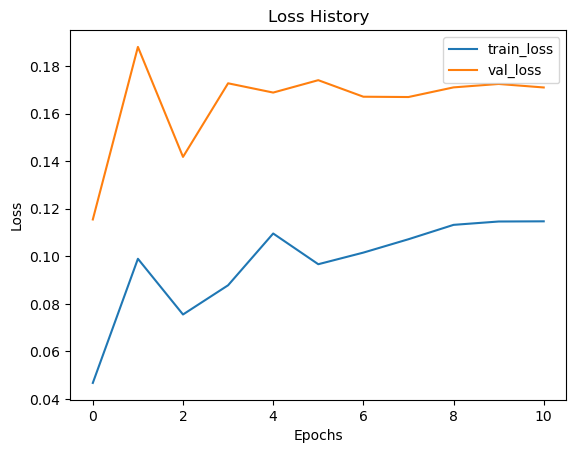

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

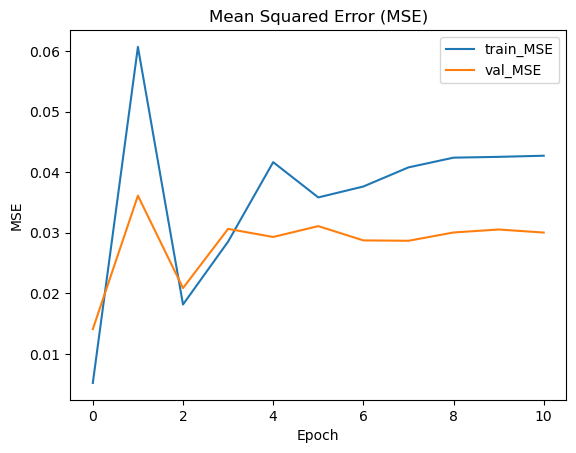

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

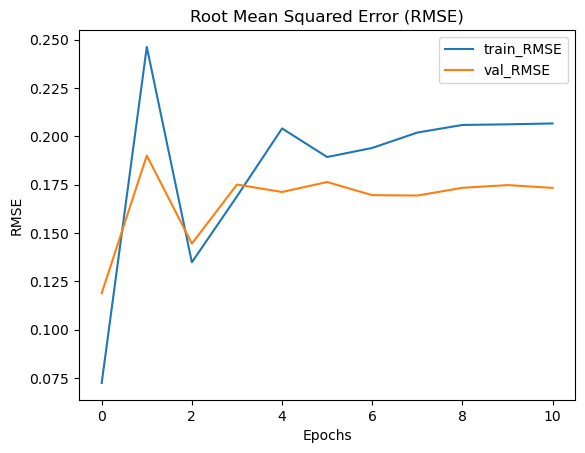

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

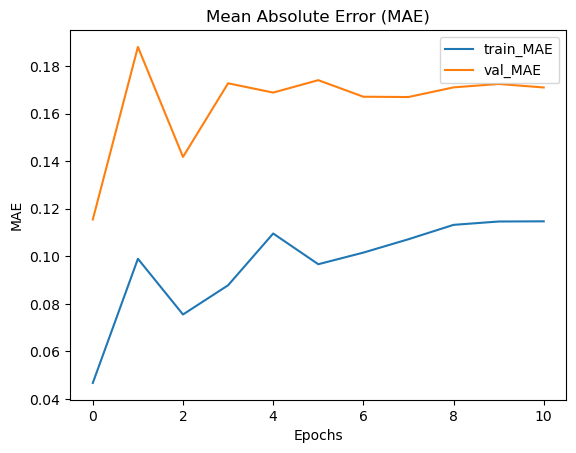

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

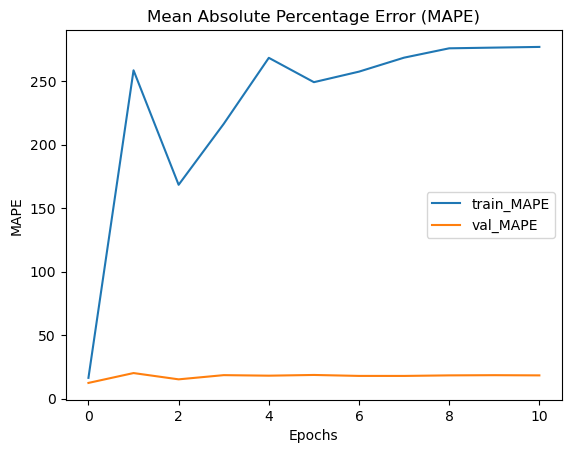

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:45:11.283144: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


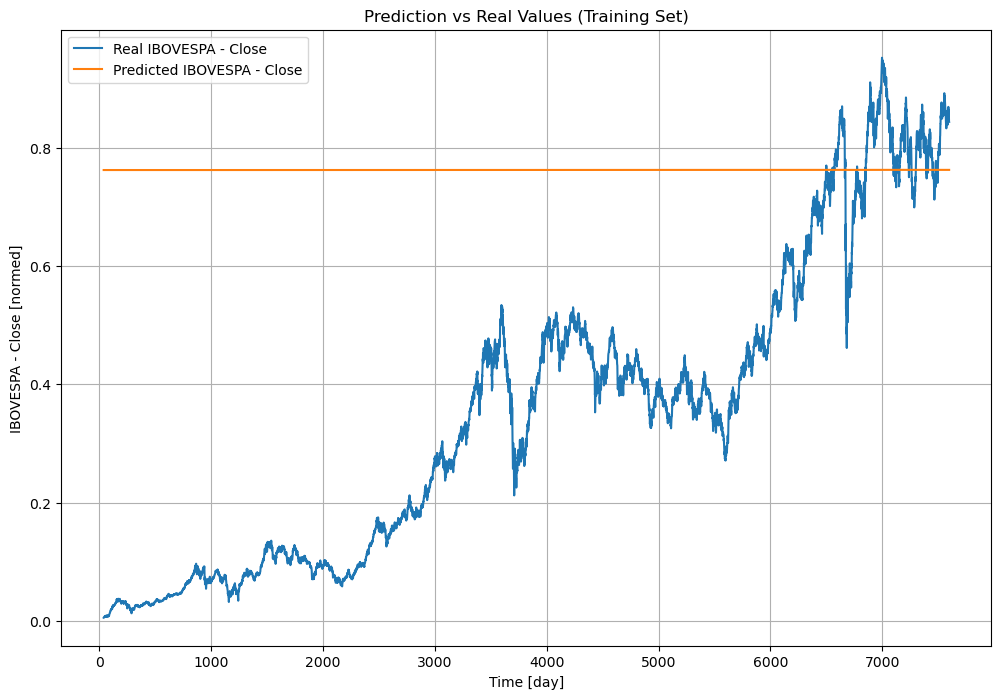

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


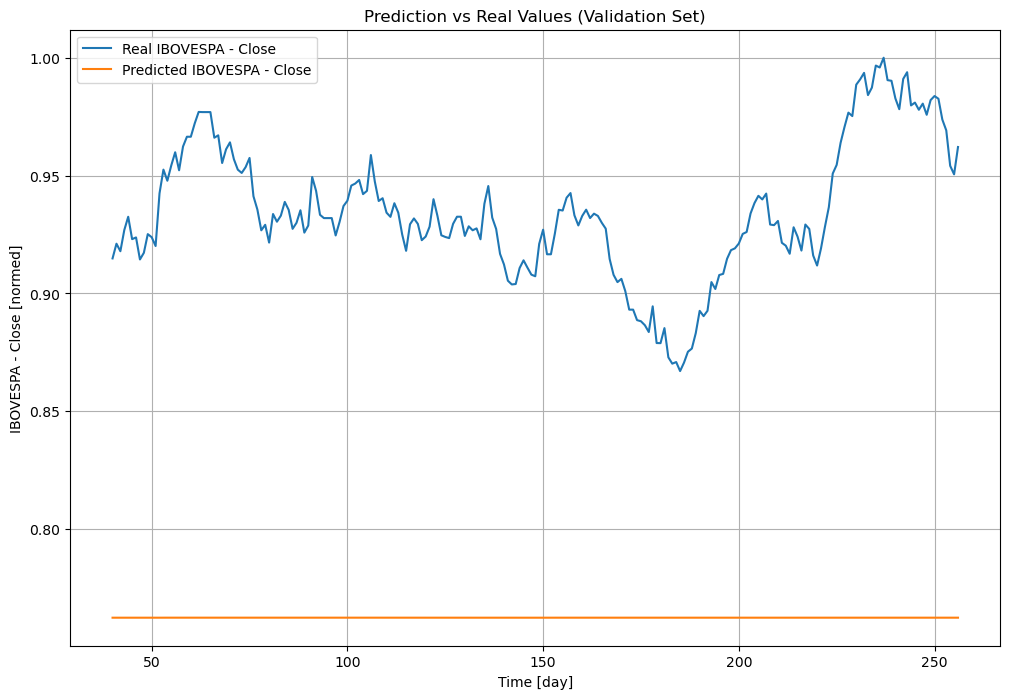

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


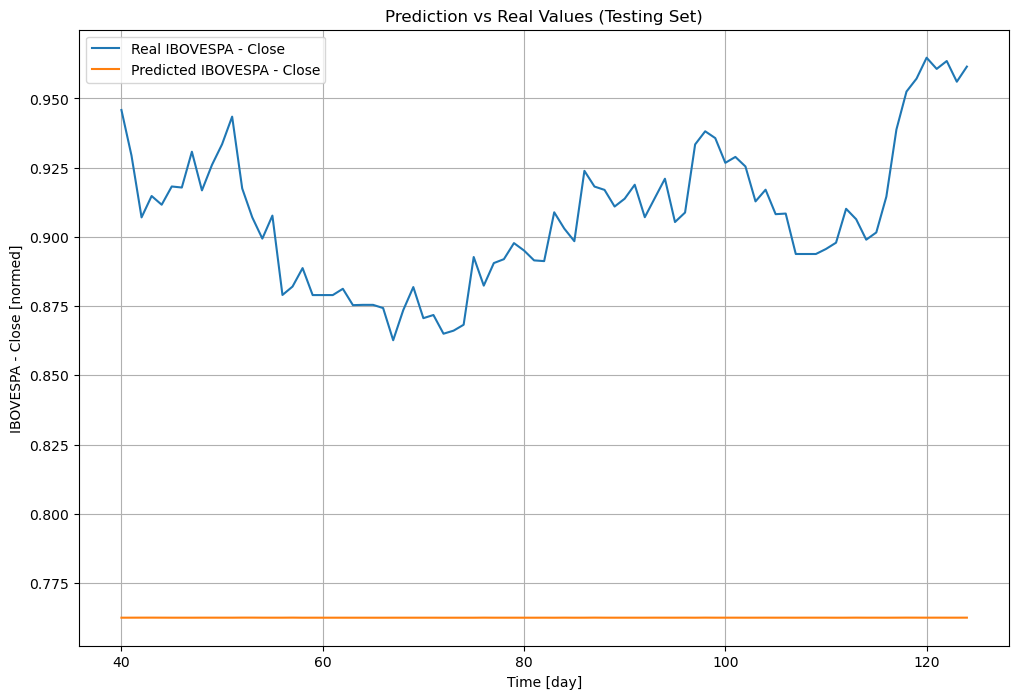

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

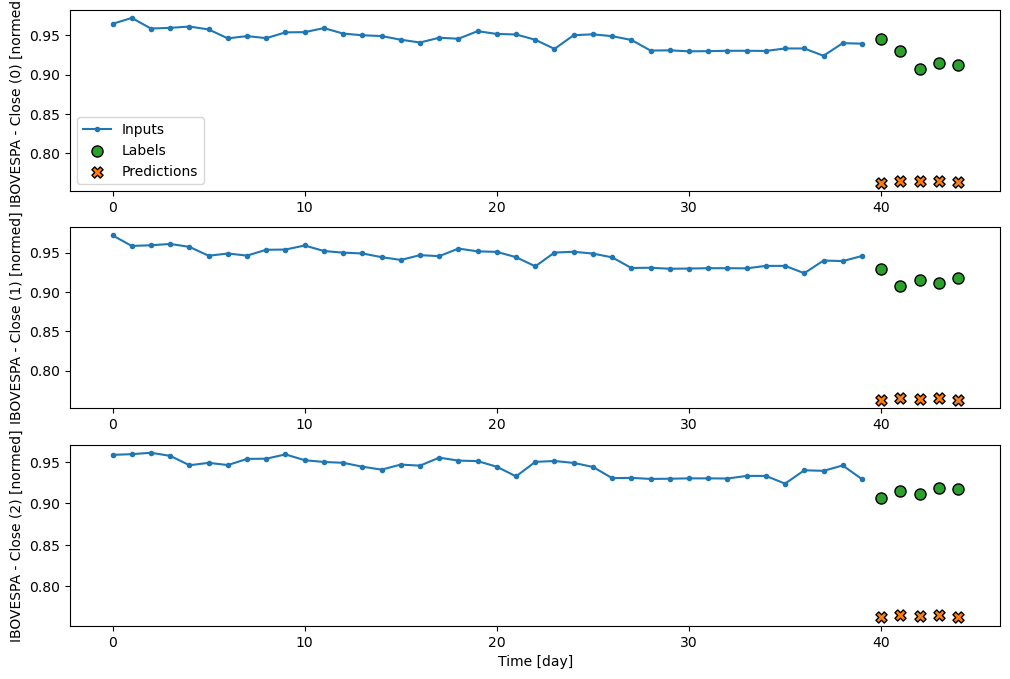

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:47s:463ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step


array([[[0.7624525 , 0.7624525 , 0.7624525 , ..., 0.7624525 ,
         0.7624525 , 0.7624525 ],
        [0.76489115, 0.76489115, 0.76489115, ..., 0.76489115,
         0.76489115, 0.76489115],
        [0.76416695, 0.76416695, 0.76416695, ..., 0.76416695,
         0.76416695, 0.76416695],
        [0.7648528 , 0.7648528 , 0.7648528 , ..., 0.7648528 ,
         0.7648528 , 0.7648528 ],
        [0.76315105, 0.76315105, 0.76315105, ..., 0.76315105,
         0.76315105, 0.76315105]],

       [[0.7624592 , 0.7624592 , 0.7624592 , ..., 0.7624592 ,
         0.7624592 , 0.7624592 ],
        [0.7648951 , 0.7648951 , 0.7648951 , ..., 0.7648951 ,
         0.7648951 , 0.7648951 ],
        [0.7641752 , 0.7641752 , 0.7641752 , ..., 0.7641752 ,
         0.7641752 , 0.7641752 ],
        [0.7648601 , 0.7648601 , 0.7648601 , ..., 0.7648601 ,
         0.7648601 , 0.7648601 ],
        [0.7631588 , 0.7631588 , 0.7631588 , ..., 0.7631588 ,
         0.7631588 , 0.7631588 ]],

       [[0.762469  , 0.762469  , 0.7

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')